In [1]:
import csv
import numpy as np
import pandas as pd
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from sklearn.model_selection import GridSearchCV

In [3]:
!pip install pyDeepInsight
!pip install keras==2.12.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 7.2 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.15.0
    Uninstalling keras-2.15.0:
      Successfully uninstalled keras-2.15.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.15.0 requires keras<2.16,>=2.15.0, but you have keras 2.12.0 which is incompatible.


In [4]:
!pip install umap

  Preparing metadata (setup.py) ... done
  Created wheel for umap: filename=umap-0.1.1-py3-none-any.whl size=3543 sha256=c95edcfdc56c32aa1dbf1f9d1eaca4464f6a9e9d1743976ee411efef87ec1c41
  Stored in directory: /root/.cache/pip/wheels/15/f1/28/53dcf7a309118ed35d810a5f9cb995217800f3f269ab5771cb
Successfully built umap


In [5]:
from pyDeepInsight import ImageTransformer, LogScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
import pandas as pd
import numpy as np


from scipy import linalg as scipy_linalg
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split

from matplotlib import pyplot as plt
import seaborn as sns
from xgboost import XGBClassifier

from sklearn import metrics
from sklearn.metrics import f1_score, classification_report, confusion_matrix
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score

import itertools

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
prosody_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/10.InterviewPrediction/1.Data/Prosody/prosodic_features_M2.csv',sep=",")

In [8]:
prosody_data.head()

participant&question   duration    energy     power  min_pitch   max_pitch  \
0                 P1Q1  51.952125  0.015331  0.000295  75.232657  396.635613   
1                 P1Q2  38.677312  0.015185  0.000393  75.165527  397.613041   
2                 P1Q3  43.593896  0.014680  0.000337  71.034761  395.930688   
3                 P1Q4  23.435813  0.008920  0.000381  74.938673  248.733738   
4                 P1Q5  13.274833  0.003432  0.000259  93.949854  263.669188   

   mean_pitch   pitch_sd   pitch_abs  pitch_quant  ...  Hired  Hired2  \
0  127.989222  27.821528  217.628692   119.690367  ...      0       0   
1  131.067490  26.452853  195.852246   124.820583  ...      0       0   
2  127.739086  26.006330  189.441736   120.457847  ...      0       0   
3  129.563914  19.334327  103.024640   124.473851  ...      0       0   
4  130.178482  26.595483  174.934601   120.272480  ...      0       0   

   posemotion  negemotion  anxiety  anger  cognitive  inhibition  perceptual  \
0         0.0         0.0      0.0    0.0       16.7         0.0         0.0   
1         0.0         0.0      0.0    0.0        0.0         0.0         0.0   
2         8.3         0.0      0.0    0.0       16.7         0.0         0.0   
3         0.0         0.0      0.0    0.0       12.5         0.0         0.0   
4         0.0         0.0      0.0    0.0        0.0         0.0         0.0   

   relativity  
0        16.7  
1         0.0  
2         0.0  
3        12.5  
4         0.0  

[5 rows x 70 columns]

In [9]:
prosody_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 680 entries, 0 to 679
Data columns (total 70 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   participant&question  680 non-null    object 
 1   duration              680 non-null    float64
 2   energy                680 non-null    float64
 3   power                 680 non-null    float64
 4   min_pitch             680 non-null    float64
 5   max_pitch             680 non-null    float64
 6   mean_pitch            680 non-null    float64
 7   pitch_sd              680 non-null    float64
 8   pitch_abs             680 non-null    float64
 9   pitch_quant           680 non-null    float64
 10  pitchUvsVRatio        680 non-null    float64
 11  Time:8                680 non-null    float64
 12  iDifference           680 non-null    float64
 13  diffPitchMaxMin       680 non-null    float64
 14  diffPitchMaxMean      680 non-null    float64
 15  diffPitchMaxMode      6

In [10]:
prosody_data.describe()

duration      energy       power   min_pitch   max_pitch  mean_pitch  \
count  680.000000  680.000000  680.000000  680.000000  680.000000  680.000000   
mean    57.201539    0.010119    0.000159   74.356906  365.209221  169.242881   
std     36.117420    0.012226    0.000130    8.332808   41.614286   41.921335   
min     10.341458    0.000176    0.000013   56.049663  222.555742   92.979514   
25%     32.839339    0.002527    0.000065   71.320330  339.477409  124.543847   
50%     49.762437    0.005648    0.000119   73.929065  376.743832  180.010964   
75%     71.724484    0.013414    0.000221   75.644207  397.296921  203.342602   
max    376.992000    0.134692    0.000873  198.840510  424.360354  254.871233   

         pitch_sd   pitch_abs  pitch_quant  pitchUvsVRatio  ...       Hired  \
count  680.000000  680.000000   680.000000      680.000000  ...  680.000000   
mean    42.009550  246.886862   163.655634        1.193068  ...    0.073529   
std     13.154095   76.500370    46.615600        0.795525  ...    0.261196   
min     12.053274   76.004974    82.801688        0.301339  ...    0.000000   
25%     33.160269  196.724385   113.288462        0.736553  ...    0.000000   
50%     40.569432  247.524278   178.438806        1.035074  ...    0.000000   
75%     48.220307  293.743385   203.973193        1.350608  ...    0.000000   
max     97.363392  524.459680   247.959843        7.681538  ...    1.000000   

           Hired2  posemotion  negemotion     anxiety       anger   cognitive  \
count  680.000000  680.000000  680.000000  680.000000  680.000000  680.000000   
mean     0.139706    4.300382    0.180912    0.311176    0.005412   10.116059   
std      0.346937    4.759913    1.058468    1.500412    0.101053    7.551342   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    5.172500   
50%      0.000000    3.570000    0.000000    0.000000    0.000000    9.250000   
75%      0.000000    7.140000    0.000000    0.000000    0.000000   13.330000   
max      1.000000   33.330000   18.180000   12.500000    2.440000   66.670000   

       inhibition  perceptual  relativity  
count  680.000000  680.000000  680.000000  
mean     0.180324    0.503235    1.621118  
std      1.065686    1.577857    3.817941  
min      0.000000    0.000000    0.000000  
25%      0.000000    0.000000    0.000000  
50%      0.000000    0.000000    0.000000  
75%      0.000000    0.000000    1.675000  
max     18.180000   15.380000   35.710000  

[8 rows x 69 columns]

            duration    energy     power  min_pitch  max_pitch  mean_pitch  \
duration    1.000000  0.635717  0.221530  -0.220980   0.343747   -0.148884   
energy      0.635717  1.000000  0.783481  -0.053317   0.292785   -0.108106   
power       0.221530  0.783481  1.000000   0.070600   0.253910   -0.027288   
min_pitch  -0.220980 -0.053317  0.070600   1.000000  -0.088502    0.165153   
max_pitch   0.343747  0.292785  0.253910  -0.088502   1.000000    0.244193   
...              ...       ...       ...        ...        ...         ...   
anger       0.035760  0.067821  0.063793   0.004579   0.075169    0.035582   
cognitive   0.013550 -0.059857 -0.052998   0.001220  -0.068091   -0.172249   
inhibition -0.031907 -0.036721 -0.036185   0.001702  -0.001486   -0.006564   
perceptual  0.001914 -0.038543 -0.061006  -0.007716  -0.018770   -0.034708   
relativity -0.007439 -0.042491 -0.051992  -0.047834  -0.072854   -0.129720   

            pitch_sd  pitch_abs  pitch_quant  pitchUvsVRatio  .

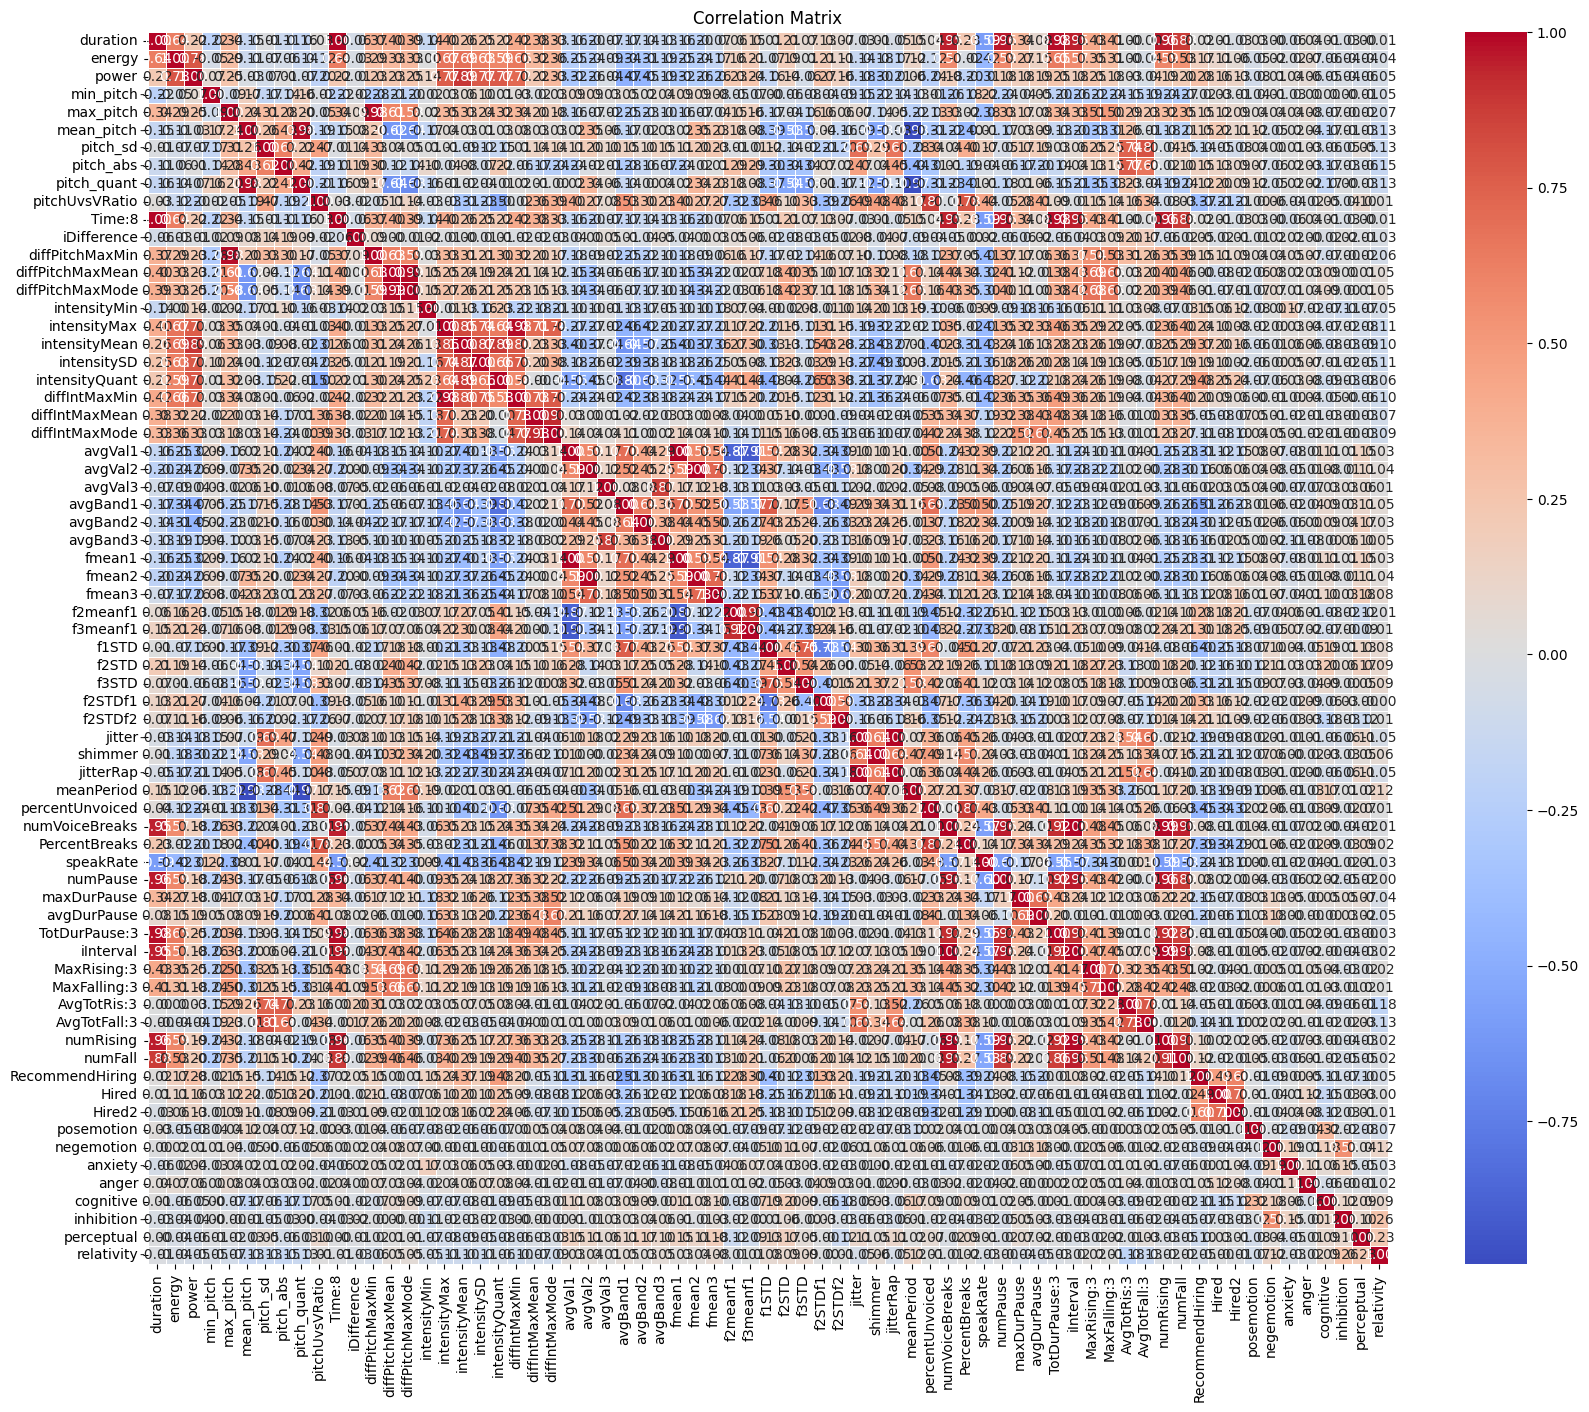

In [17]:
prosody_data1 = prosody_data.drop('participant&question', axis=1)
correlation_matrix = prosody_data1.corr()

# Step 3: Print the correlation matrix
print(correlation_matrix)

# Step 4: Visualize the correlation matrix
plt.figure(figsize=(20, 16))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

##Feature Engineering
Introducing a new column "Hired3C" to the dataset belonging to three classes - Hired, Not Hired and Reserved. Classes are assigned based on the Recommend Hiring values.

In [18]:
def create_Column(value):
    if value > 5.30:
        return 'Hired'
    elif 4.73 <= value <= 5.30:
        return 'Reserved'
    else:
        return 'Not-Hired'

# Apply the function to create the new column 'Hired3C'
prosody_data['Hired3C'] = prosody_data['RecommendHiring'].apply(create_Column)

prosody_data['Hired3C']

0       Reserved
1       Reserved
2       Reserved
3       Reserved
4       Reserved
         ...    
675    Not-Hired
676    Not-Hired
677    Not-Hired
678    Not-Hired
679    Not-Hired
Name: Hired3C, Length: 680, dtype: object

In [19]:
y = prosody_data['Hired3C'].values

In [20]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode the target variable into numerical values
y_encoded = label_encoder.fit_transform(y)

# Now, y_encoded contains numerical values representing the classes
prosody_data['Hired3C']=y_encoded

In [21]:
prosody_data

participant&question    duration    energy     power  min_pitch  \
0                   P1Q1   51.952125  0.015331  0.000295  75.232657   
1                   P1Q2   38.677312  0.015185  0.000393  75.165527   
2                   P1Q3   43.593896  0.014680  0.000337  71.034761   
3                   P1Q4   23.435813  0.008920  0.000381  74.938673   
4                   P1Q5   13.274833  0.003432  0.000259  93.949854   
..                   ...         ...       ...       ...        ...   
675               PP89Q1   76.333333  0.018540  0.000243  74.344414   
676               PP89Q2   60.628396  0.017723  0.000292  72.955935   
677               PP89Q3  131.118042  0.028155  0.000215  72.806624   
678               PP89Q4   85.464125  0.027269  0.000319  65.836502   
679               PP89Q5   49.306229  0.007684  0.000156  77.520809   

      max_pitch  mean_pitch   pitch_sd   pitch_abs  pitch_quant  ...  Hired2  \
0    396.635613  127.989222  27.821528  217.628692   119.690367  ...       0   
1    397.613041  131.067490  26.452853  195.852246   124.820583  ...       0   
2    395.930688  127.739086  26.006330  189.441736   120.457847  ...       0   
3    248.733738  129.563914  19.334327  103.024640   124.473851  ...       0   
4    263.669188  130.178482  26.595483  174.934601   120.272480  ...       0   
..          ...         ...        ...         ...          ...  ...     ...   
675  382.978887  142.627278  24.480275  146.910240   136.814270  ...       0   
676  396.654629  145.442889  31.189455  173.895102   135.946832  ...       0   
677  293.105036  138.740341  21.224634  143.577876   132.138036  ...       0   
678  387.213912  142.979222  32.409678  169.441817   132.272303  ...       0   
679  375.522678  135.363582  23.088338  131.030416   128.851294  ...       0   

     posemotion  negemotion  anxiety  anger  cognitive  inhibition  \
0          0.00         0.0     0.00    0.0      16.70         0.0   
1          0.00         0.0     0.00    0.0       0.00         0.0   
2          8.30         0.0     0.00    0.0      16.70         0.0   
3          0.00         0.0     0.00    0.0      12.50         0.0   
4          0.00         0.0     0.00    0.0       0.00         0.0   
..          ...         ...      ...    ...        ...         ...   
675        0.36         0.0     0.36    0.0       2.88         0.0   
676        0.40         0.0     0.00    0.0       3.21         0.0   
677        0.00         0.0     0.31    0.0       3.06         0.0   
678        0.00         0.0     0.54    0.0       2.42         0.0   
679        0.35         0.0     0.00    0.0       2.82         0.0   

     perceptual  relativity  Hired3C  
0          0.00       16.70        2  
1          0.00        0.00        2  
2          0.00        0.00        2  
3          0.00       12.50        2  
4          0.00        0.00        2  
..          ...         ...      ...  
675        0.72        2.52        1  
676        2.01        2.01        1  
677        2.45        2.14        1  
678        1.61        1.61        1  
679        2.11        2.82        1  

[680 rows x 71 columns]

In [22]:
import pandas as pd

# Assuming 'y' contains the target variable with three classes

# Convert the target variable to a pandas Series if it's not already
y_series = pd.Series(y_encoded)

# Calculate class frequencies
class_counts = y_series.value_counts()

# Display class frequencies
print("Class Frequencies:")
print(class_counts)

# Calculate class proportions
class_proportions = y_series.value_counts(normalize=True)

# Display class proportions
print("\nClass Proportions:")
print(class_proportions)


Class Frequencies:
1    230
2    225
0    225
Name: count, dtype: int64

Class Proportions:
1    0.338235
2    0.330882
0    0.330882
Name: proportion, dtype: float64


## Data Visualization

In [23]:
df=prosody_data[['duration', 'energy', 'power', 'min_pitch', 'max_pitch', 'mean_pitch', 'pitch_sd', 'pitch_abs', 'pitch_quant', 'pitchUvsVRatio', 'Time:8', 'iDifference', 'diffPitchMaxMin', 'diffPitchMaxMean', 'diffPitchMaxMode', 'intensityMin', 'intensityMax', 'intensityMean', 'intensitySD', 'intensityQuant', 'diffIntMaxMin', 'diffIntMaxMean', 'diffIntMaxMode', 'avgVal1', 'avgVal2', 'avgVal3', 'avgBand1', 'avgBand2', 'avgBand3', 'fmean1', 'fmean2', 'fmean3', 'f2meanf1', 'f3meanf1', 'f1STD', 'f2STD']]
import plotly.graph_objects as go

import pandas as pd

fig = go.Figure(data=
    go.Parcoords(
        line = dict(color = prosody_data["Hired3C"],colorscale = [[0, 'green'], [0.5, 'red'], [1.0, 'rgb(0,0 , 255)']],showscale = True),
        #line = dict(color = MRH,colorscale = 'Electric', showscale = True, cmin = -4000, cmax = -100),
         dimensions = list([
            dict(range = [min(df['duration']),max(df['duration'])], constraintrange = [1,2], label = 'duration', values = df['duration']),
            dict(range = [min(df['avgBand1']),max(df['avgBand1'])],label = 'Average Band1', values = df['avgBand1']),
            dict(range = [min(df['avgVal2']),max(df['avgVal2'])], label = 'avgVal2', values = df['avgVal2']),
            dict(range = [min(df['diffPitchMaxMode']),max(df['diffPitchMaxMode'])], label = 'diffPitchMaxMode', values = df['diffPitchMaxMode']),
            dict(range = [min(df['intensityMean']),max(df['intensityMean'])], label = 'intensityMean', values = df['intensityMean']),
            dict(range = [min(df['intensityMin']),max(df['intensityMin'])], label = 'intensityMin', values = df['intensityMin']),
            dict(range = [min(df['intensityQuant']),max(df['intensityQuant'])], label = 'intensityQuant', values = df['intensityQuant']),
            dict(range = [min(df['intensitySD']),max(df['intensitySD'])], label = 'intensitySD', values = df['intensitySD']),
            dict(range = [min(df['mean_pitch']),max(df['mean_pitch'])], label = 'mean_pitch', values = df['mean_pitch']),
            dict(range = [min(df['pitchUvsVRatio']),max(df['pitchUvsVRatio'])], label = 'pitchUvsVRatio', values = df['pitchUvsVRatio']),
            dict(range = [min(df['pitch_abs']),max(df['pitch_abs'])], label = 'pitch_abs', values = df['pitch_abs']),
            dict(range = [min(df['pitch_quant']),max(df['pitch_quant'])], label = 'pitch_quant', values = df['pitch_quant']),
            dict(range = [min(df['pitch_sd']),max(df['pitch_sd'])], label = 'pitch_sd', values = df['pitch_sd']),
            dict(range = [min(df['power']),max(df['power'])], label = 'Power', values = df['power'])
        ])

    )
)

fig.update_layout(
    plot_bgcolor = 'white',
    paper_bgcolor = 'white'
)

fig.show()

In [24]:
df=prosody_data[['duration', 'energy', 'power', 'min_pitch', 'max_pitch', 'mean_pitch', 'pitch_sd', 'pitch_abs', 'pitch_quant', 'pitchUvsVRatio', 'Time:8', 'iDifference', 'diffPitchMaxMin', 'diffPitchMaxMean', 'diffPitchMaxMode', 'intensityMin', 'intensityMax', 'intensityMean', 'intensitySD', 'intensityQuant', 'diffIntMaxMin', 'diffIntMaxMean', 'diffIntMaxMode', 'avgVal1', 'avgVal2', 'avgVal3', 'avgBand1', 'avgBand2', 'avgBand3', 'fmean1', 'fmean2', 'fmean3', 'f2meanf1', 'f3meanf1', 'f1STD', 'f2STD']]
import plotly.graph_objects as go

import pandas as pd

fig = go.Figure(data=
    go.Parcoords(
        line = dict(color = prosody_data["Hired3C"],colorscale = [[0, 'green'], [0.5, 'red'], [1.0, 'rgb(0,0 , 255)']],showscale = True),
        #line = dict(color = MRH,colorscale = 'Electric', showscale = True, cmin = -4000, cmax = -100),
         dimensions = list([
            dict(range = [min(df['duration']),max(df['duration'])], constraintrange = [1,2], label = 'duration', values = df['duration']),
            dict(range = [min(df['avgBand1']),max(df['avgBand1'])],label = 'Average Band1', values = df['avgBand1']),
            dict(range = [min(df['avgVal2']),max(df['avgVal2'])], label = 'avgVal2', values = df['avgVal2']),
            dict(range = [min(df['diffPitchMaxMode']),max(df['diffPitchMaxMode'])], label = 'diffPitchMaxMode', values = df['diffPitchMaxMode']),
            dict(range = [min(df['intensityMean']),max(df['intensityMean'])], label = 'intensityMean', values = df['intensityMean']),
            dict(range = [min(df['intensityMin']),max(df['intensityMin'])], label = 'intensityMin', values = df['intensityMin']),
            dict(range = [min(df['intensityQuant']),max(df['intensityQuant'])], label = 'intensityQuant', values = df['intensityQuant']),
            dict(range = [min(df['intensitySD']),max(df['intensitySD'])], label = 'intensitySD', values = df['intensitySD']),
            dict(range = [min(df['mean_pitch']),max(df['mean_pitch'])], label = 'mean_pitch', values = df['mean_pitch']),
            dict(range = [min(df['pitchUvsVRatio']),max(df['pitchUvsVRatio'])], label = 'pitchUvsVRatio', values = df['pitchUvsVRatio']),
            dict(range = [min(df['pitch_abs']),max(df['pitch_abs'])], label = 'pitch_abs', values = df['pitch_abs']),
            dict(range = [min(df['pitch_quant']),max(df['pitch_quant'])], label = 'pitch_quant', values = df['pitch_quant']),
            dict(range = [min(df['pitch_sd']),max(df['pitch_sd'])], label = 'pitch_sd', values = df['pitch_sd']),
            dict(range = [min(df['power']),max(df['power'])], label = 'Power', values = df['power'])
        ])

    )
)

fig.update_layout(
    plot_bgcolor = 'white',
    paper_bgcolor = 'white'
)

fig.show()

In [25]:
yRH = prosody_data['RecommendHiring']
cRH = prosody_data['Hired3C']

In [26]:
x1 = prosody_data['posemotion']
x2 = prosody_data['anxiety']
x3 = prosody_data['perceptual']
x4 = prosody_data['cognitive']
x5 = prosody_data['relativity']
x6 = prosody_data['anger']
x7 = prosody_data['negemotion']
x6 = prosody_data['inhibition']

Text(0.5, 0, 'RecommendHiring')

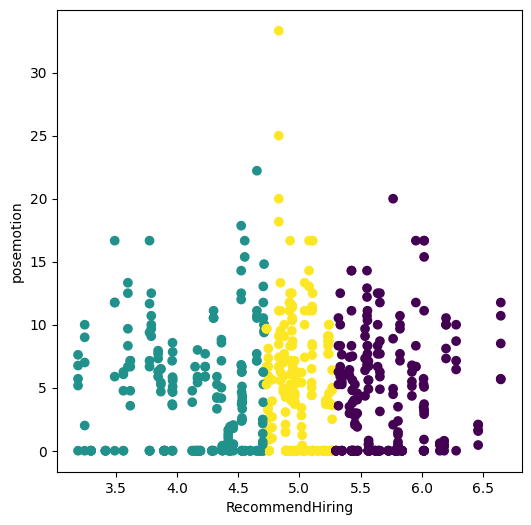

In [27]:

# Creating plot
fig = plt.figure(figsize=(6,6))


ax = plt.axes()

#Creating color map plasma ocean RdPu  jet PiYG OrRd GnBu RdGy  RdBu BuGn BrBG viridis mako_r
plt.scatter(yRH,x1, c=cRH, cmap= 'viridis')
plt.ylabel('posemotion')
plt.xlabel('RecommendHiring')


Text(0.5, 0, 'Recommend Hiring')

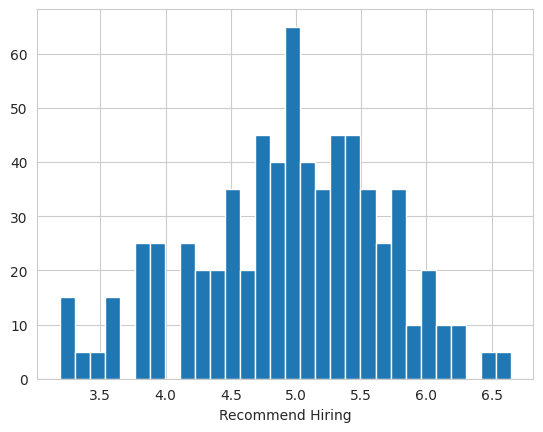

In [28]:
sns.set_style('whitegrid')
prosody_data['RecommendHiring'].hist(bins=30)
plt.xlabel('Recommend Hiring')

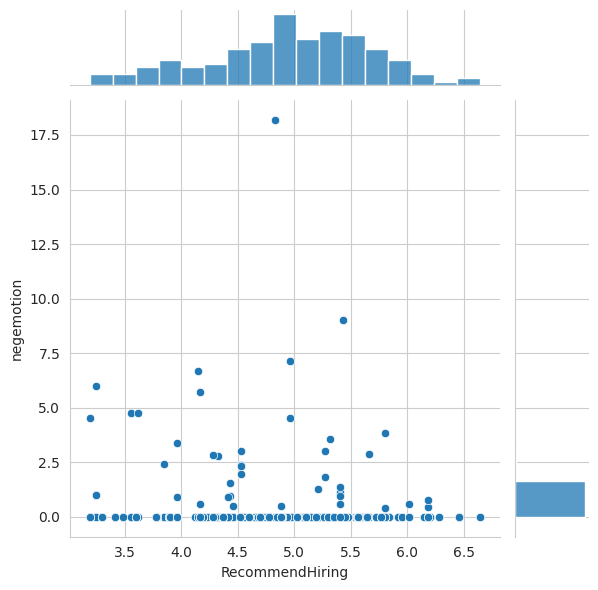

In [29]:
sns.jointplot(y='negemotion', x='RecommendHiring', data=prosody_data)

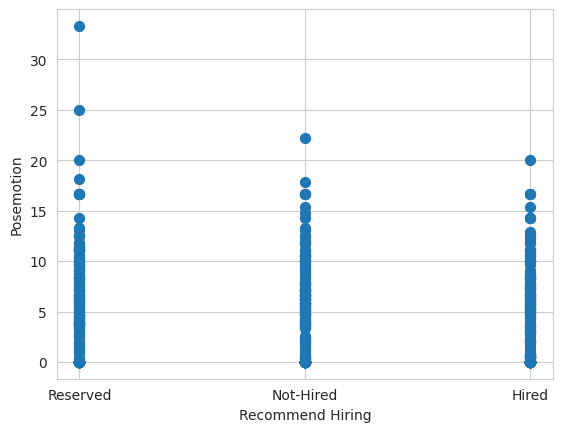

In [30]:
plt.scatter(y,x1,s=50)
plt.ylabel('Posemotion')
plt.xlabel('Recommend Hiring')
plt.show()

Text(0.5, 0, 'RecommendHiring')

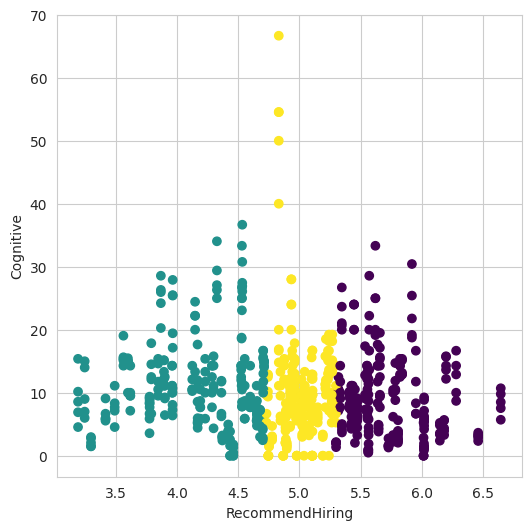

In [31]:
fig = plt.figure(figsize=(6,6))


ax = plt.axes()

#Creating color map plasma ocean RdPu  jet PiYG OrRd GnBu RdGy  RdBu BuGn BrBG viridis mako_r
plt.scatter(yRH,x4, c=cRH, cmap= 'viridis')
plt.ylabel('Cognitive')
plt.xlabel('RecommendHiring')


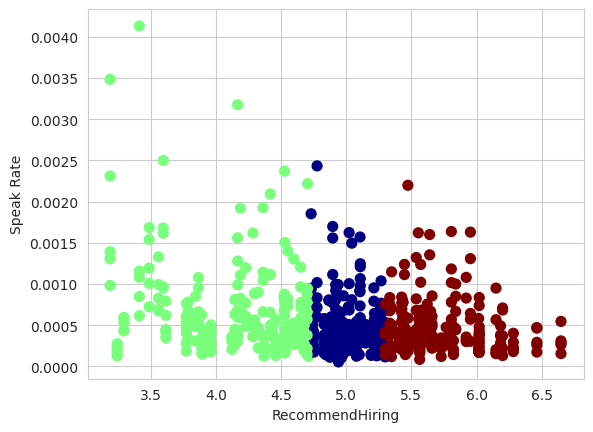

In [32]:
x2 = prosody_data['speakRate']
plt.scatter(yRH,x2,c=cRH, cmap= 'jet_r',s=50)
plt.ylabel('Speak Rate')
plt.xlabel('RecommendHiring')
plt.show()

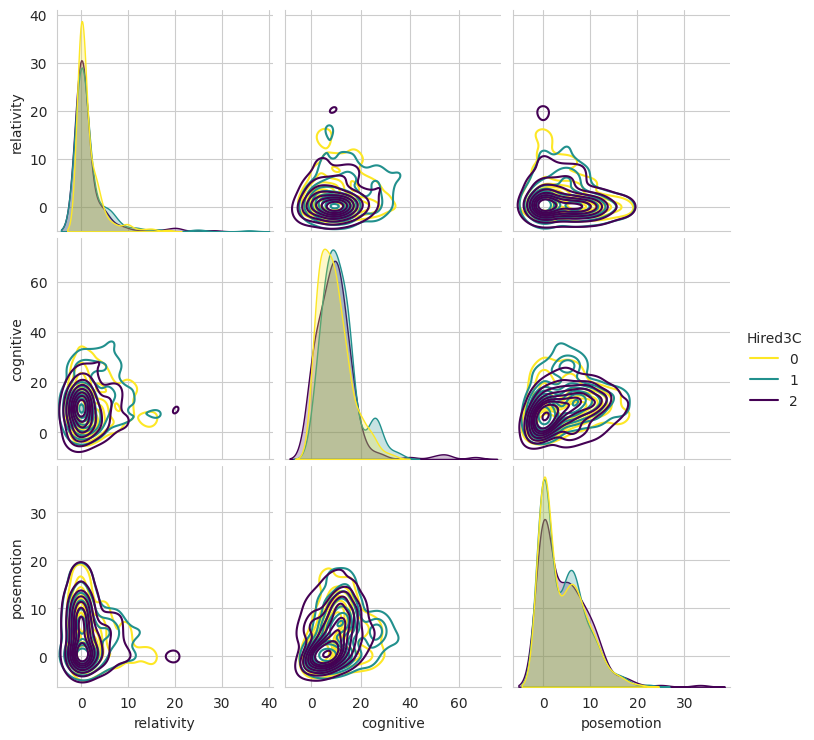

In [33]:
df1=prosody_data[['relativity', 'cognitive', 'posemotion','Hired3C']]
sns.pairplot(df1,hue='Hired3C',kind='kde',palette='viridis_r')

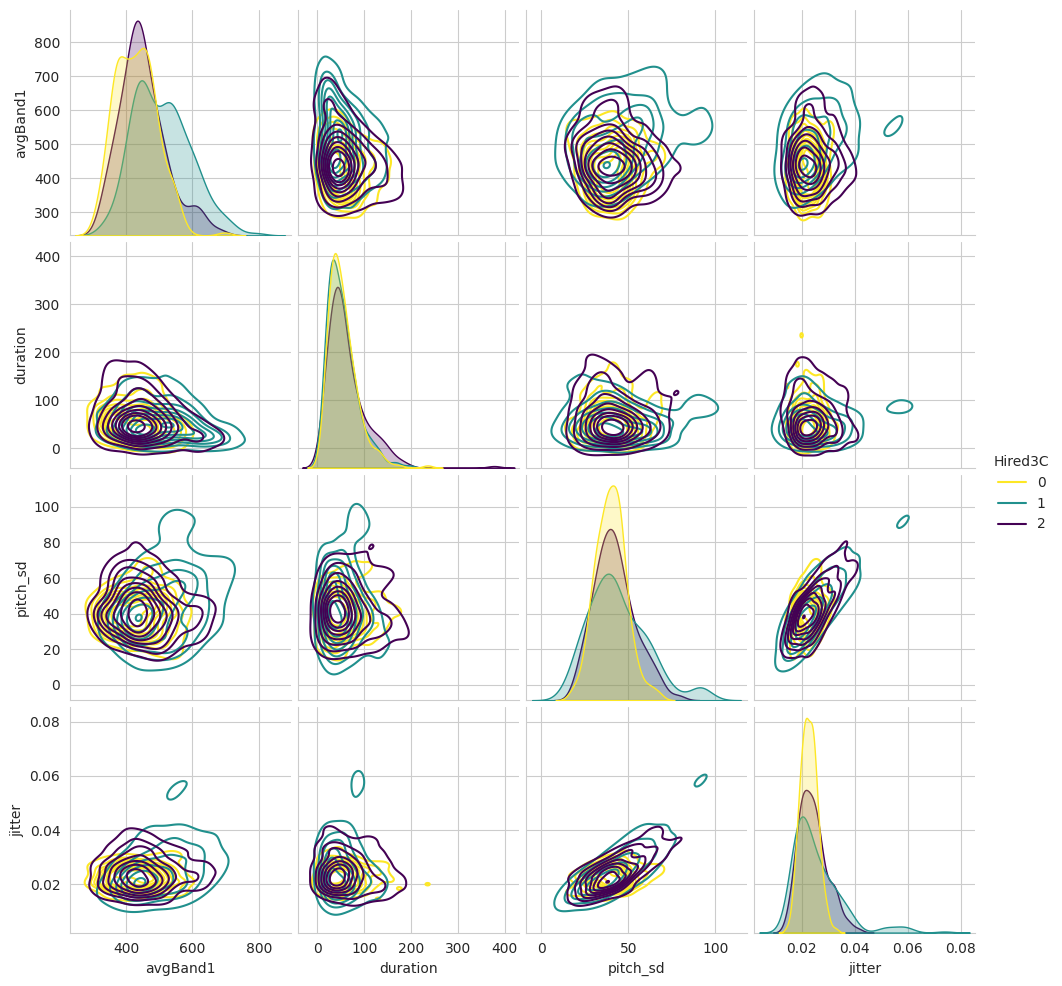

In [34]:
df1=prosody_data[['avgBand1', 'duration', 'pitch_sd', 'jitter','Hired3C']]
sns.pairplot(df1,hue='Hired3C',kind='kde',palette='viridis_r')

## Feature Selection using Lasso Regression

In [35]:
prosody_data_X = prosody_data.drop(['participant&question','Hired','Hired2','RecommendHiring'],axis=1)
prosody_data_y = prosody_data['RecommendHiring']

In [36]:
X_train, X_test, y_train, y_test = train_test_split(prosody_data_X, prosody_data_y, test_size=0.20, random_state=10)

In [63]:
ranks = {}
from sklearn.preprocessing import MinMaxScaler

def rank_to_dict(ranks, names, order=1):
    minmax = MinMaxScaler()
    ranks = minmax.fit_transform(order*np.array([ranks]).T).T[0]
    #ranks = map(lambda x: round(x, 5), ranks)
    return dict(zip(names, ranks ))

In [64]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score

In [65]:
lasso = Lasso(alpha=.5)
lasso.fit(X_train, y_train)

cross_val_score(lasso, prosody_data_X , prosody_data_y,cv=3)

array([-0.03316206, -0.02601471, -0.22667476])

In [66]:
ranks["Lasso"] = rank_to_dict(np.abs(lasso.coef_), prosody_data_X)
rankDict = {}
rankDict = ranks['Lasso']
rankDict

{'duration': 0.0,
 'energy': 0.0,
 'power': 0.0,
 'min_pitch': 0.0,
 'max_pitch': 0.0,
 'mean_pitch': 0.5392029200471151,
 'pitch_sd': 0.0,
 'pitch_abs': 0.07381949442044583,
 'pitch_quant': 0.0,
 'pitchUvsVRatio': 0.0,
 'Time:8': 0.0,
 'iDifference': 0.15459271385929427,
 'diffPitchMaxMin': 0.0,
 'diffPitchMaxMean': 0.0,
 'diffPitchMaxMode': 0.17794024535967662,
 'intensityMin': 0.0,
 'intensityMax': 0.0,
 'intensityMean': 0.0,
 'intensitySD': 0.0,
 'intensityQuant': 0.0,
 'diffIntMaxMin': 0.0,
 'diffIntMaxMean': 0.0,
 'diffIntMaxMode': 0.0,
 'avgVal1': 0.15180180565376666,
 'avgVal2': 0.0,
 'avgVal3': 0.026009423789674087,
 'avgBand1': 0.8680701363237353,
 'avgBand2': 0.19564792694391298,
 'avgBand3': 0.2584729558009599,
 'fmean1': 0.004847388572671383,
 'fmean2': 0.34758450343006275,
 'fmean3': 0.12197662036765036,
 'f2meanf1': 0.0,
 'f3meanf1': 0.0,
 'f1STD': 0.0,
 'f2STD': 0.0,
 'f3STD': 0.7032615676285865,
 'f2STDf1': 0.0,
 'f2STDf2': 0.0,
 'jitter': 0.0,
 'shimmer': 0.0,
 'jitte

In [67]:
selectedFeatures_Lasso = []

selectedFeatures_Lasso = dict(sorted(rankDict.items(), key=lambda item: item[1],reverse=True))


selectedFeatures_Lasso_10 = []
i=0
for key in selectedFeatures_Lasso.keys():
    if(i<10):
        selectedFeatures_Lasso_10.append(key)
        i+=1

selectedFeatures_Lasso_20 = []
i=0
for key in selectedFeatures_Lasso.keys():
    if(i<20):
        selectedFeatures_Lasso_20.append(key)
        i+=1

selectedFeatures_Lasso_30 = []
i=0
for key in selectedFeatures_Lasso.keys():
    if(i<30):
        selectedFeatures_Lasso_30.append(key)
        i+=1
print("Top 10 Selected Features Using Lasso:",selectedFeatures_Lasso_10 )

print("\n\n\nTop 20 Selected Features Using Lasso:",selectedFeatures_Lasso_20 )

print("\n\n\nTop 30 Selected Features Using Lasso:",selectedFeatures_Lasso_30 )

#selectedFeatures_Lasso.keys()

Top 10 Selected Features Using Lasso: ['AvgTotRis:3', 'avgBand1', 'f3STD', 'mean_pitch', 'fmean2', 'avgBand3', 'avgBand2', 'diffPitchMaxMode', 'MaxFalling:3', 'iDifference']



Top 20 Selected Features Using Lasso: ['AvgTotRis:3', 'avgBand1', 'f3STD', 'mean_pitch', 'fmean2', 'avgBand3', 'avgBand2', 'diffPitchMaxMode', 'MaxFalling:3', 'iDifference', 'avgVal1', 'fmean3', 'pitch_abs', 'avgVal3', 'numFall', 'fmean1', 'duration', 'energy', 'power', 'min_pitch']



Top 30 Selected Features Using Lasso: ['AvgTotRis:3', 'avgBand1', 'f3STD', 'mean_pitch', 'fmean2', 'avgBand3', 'avgBand2', 'diffPitchMaxMode', 'MaxFalling:3', 'iDifference', 'avgVal1', 'fmean3', 'pitch_abs', 'avgVal3', 'numFall', 'fmean1', 'duration', 'energy', 'power', 'min_pitch', 'max_pitch', 'pitch_sd', 'pitch_quant', 'pitchUvsVRatio', 'Time:8', 'diffPitchMaxMin', 'diffPitchMaxMean', 'intensityMin', 'intensityMax', 'intensityMean']


In [68]:
prosody_data

participant&question    duration    energy     power  min_pitch  \
0                   P1Q1   51.952125  0.015331  0.000295  75.232657   
1                   P1Q2   38.677312  0.015185  0.000393  75.165527   
2                   P1Q3   43.593896  0.014680  0.000337  71.034761   
3                   P1Q4   23.435813  0.008920  0.000381  74.938673   
4                   P1Q5   13.274833  0.003432  0.000259  93.949854   
..                   ...         ...       ...       ...        ...   
675               PP89Q1   76.333333  0.018540  0.000243  74.344414   
676               PP89Q2   60.628396  0.017723  0.000292  72.955935   
677               PP89Q3  131.118042  0.028155  0.000215  72.806624   
678               PP89Q4   85.464125  0.027269  0.000319  65.836502   
679               PP89Q5   49.306229  0.007684  0.000156  77.520809   

      max_pitch  mean_pitch   pitch_sd   pitch_abs  pitch_quant  ...  Hired2  \
0    396.635613  127.989222  27.821528  217.628692   119.690367  ...       0   
1    397.613041  131.067490  26.452853  195.852246   124.820583  ...       0   
2    395.930688  127.739086  26.006330  189.441736   120.457847  ...       0   
3    248.733738  129.563914  19.334327  103.024640   124.473851  ...       0   
4    263.669188  130.178482  26.595483  174.934601   120.272480  ...       0   
..          ...         ...        ...         ...          ...  ...     ...   
675  382.978887  142.627278  24.480275  146.910240   136.814270  ...       0   
676  396.654629  145.442889  31.189455  173.895102   135.946832  ...       0   
677  293.105036  138.740341  21.224634  143.577876   132.138036  ...       0   
678  387.213912  142.979222  32.409678  169.441817   132.272303  ...       0   
679  375.522678  135.363582  23.088338  131.030416   128.851294  ...       0   

     posemotion  negemotion  anxiety  anger  cognitive  inhibition  \
0          0.00         0.0     0.00    0.0      16.70         0.0   
1          0.00         0.0     0.00    0.0       0.00         0.0   
2          8.30         0.0     0.00    0.0      16.70         0.0   
3          0.00         0.0     0.00    0.0      12.50         0.0   
4          0.00         0.0     0.00    0.0       0.00         0.0   
..          ...         ...      ...    ...        ...         ...   
675        0.36         0.0     0.36    0.0       2.88         0.0   
676        0.40         0.0     0.00    0.0       3.21         0.0   
677        0.00         0.0     0.31    0.0       3.06         0.0   
678        0.00         0.0     0.54    0.0       2.42         0.0   
679        0.35         0.0     0.00    0.0       2.82         0.0   

     perceptual  relativity  Hired3C  
0          0.00       16.70        2  
1          0.00        0.00        2  
2          0.00        0.00        2  
3          0.00       12.50        2  
4          0.00        0.00        2  
..          ...         ...      ...  
675        0.72        2.52        1  
676        2.01        2.01        1  
677        2.45        2.14        1  
678        1.61        1.61        1  
679        2.11        2.82        1  

[680 rows x 71 columns]

In [69]:
selectedFeatures_Lasso_10

['AvgTotRis:3',
 'avgBand1',
 'f3STD',
 'mean_pitch',
 'fmean2',
 'avgBand3',
 'avgBand2',
 'diffPitchMaxMode',
 'MaxFalling:3',
 'iDifference']

In [70]:
#import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
#from matplotlib import pyplot

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


In [71]:
# define 10-fold cross validation test harness
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)

In [72]:
scaler = MinMaxScaler()
X=scaler.fit_transform(prosody_data[selectedFeatures_Lasso_20])
y=prosody_data['Hired3C']

In [73]:
from sklearn.decomposition import PCA
pca = PCA(n_components=20)
pca.fit(X)
X_pca = pca.transform(X)
principalDf = pd.DataFrame(data = X_pca , columns = ['PC1', 'PC2','PC3', 'PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11', 'PC12','PC13', 'PC14','PC15', 'PC16','PC17', 'PC18','PC19', 'PC20'])
principalDf

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0   -0.640963 -0.181555  0.185482  0.082235 -0.111553 -0.026414  0.126283   
1   -0.691659 -0.265489  0.189961 -0.014488 -0.094937  0.069438  0.144195   
2   -0.492910 -0.074600  0.218173 -0.128678  0.017298  0.104880  0.193287   
3    0.053984  0.051715  0.702208 -0.279681  0.100659  0.244603  0.378866   
4    0.045368  0.026312  0.574661 -0.169463  0.060203  0.085266  0.169758   
..        ...       ...       ...       ...       ...       ...       ...   
675 -0.280081  0.156633  0.333968 -0.077770 -0.139247  0.011696 -0.003884   
676 -0.423396  0.110249  0.158467  0.013189 -0.185566 -0.048386 -0.045801   
677 -0.103756  0.185080  0.436144 -0.182018 -0.027182  0.050506 -0.043354   
678 -0.279763  0.300217  0.073258  0.101368 -0.196229  0.051231  0.028882   
679 -0.197869  0.379565 -0.160271 -0.543176  0.282901  0.308742 -0.095053   

          PC8       PC9      PC10      PC11      PC12      PC13      PC14  \
0   -0.187023 -0.107583 -0.099867  0.047146 -0.019670  0.038162  0.127581   
1   -0.182652 -0.106227 -0.205141  0.022983  0.008997  0.071371  0.141792   
2   -0.112252 -0.158496 -0.049045  0.149894 -0.013736  0.048917  0.118103   
3   -0.088346 -0.230920  0.122025 -0.055703  0.119614  0.090504  0.137684   
4   -0.105860 -0.242408  0.043431 -0.048044  0.103019  0.012350  0.076454   
..        ...       ...       ...       ...       ...       ...       ...   
675  0.118311  0.081731 -0.059528  0.089414 -0.045173 -0.008653 -0.050522   
676  0.121444  0.152402 -0.237907  0.045016  0.020337 -0.054597 -0.072042   
677  0.299094  0.242611  0.150178 -0.038930  0.117351 -0.082915  0.046201   
678  0.186173  0.120235 -0.139246  0.047293  0.042972 -0.028026  0.034729   
679  0.004408  0.151266 -0.178733  0.038206  0.023579 -0.004157 -0.009966   

         PC15      PC16      PC17      PC18      PC19          PC20  
0   -0.044859  0.024908 -0.002873  0.016325 -0.012586  1.224395e-16  
1   -0.051700  0.010200 -0.019774 -0.018498 -0.022102  8.313903e-17  
2   -0.012231 -0.026912 -0.010617 -0.009896 -0.020190  3.314969e-17  
3    0.058573 -0.034252 -0.067745 -0.069289 -0.026800 -2.209994e-17  
4    0.082378  0.112649 -0.043328 -0.019231 -0.024571  2.651500e-18  
..        ...       ...       ...       ...       ...           ...  
675 -0.009361 -0.026056  0.047146 -0.004689 -0.027763 -5.295185e-17  
676 -0.048096 -0.026778  0.016007 -0.002723 -0.014707 -3.087109e-17  
677 -0.018794  0.009240  0.027019  0.021438 -0.035017 -1.202838e-16  
678 -0.025100 -0.061455  0.025113  0.000229 -0.011282 -2.440993e-17  
679 -0.033829  0.005728  0.015247 -0.008075 -0.021017 -2.260622e-16  

[680 rows x 20 columns]

In [74]:
finalDf = pd.concat([principalDf, prosody_data[['Hired3C']]], axis = 1)
finalDf

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0   -0.640963 -0.181555  0.185482  0.082235 -0.111553 -0.026414  0.126283   
1   -0.691659 -0.265489  0.189961 -0.014488 -0.094937  0.069438  0.144195   
2   -0.492910 -0.074600  0.218173 -0.128678  0.017298  0.104880  0.193287   
3    0.053984  0.051715  0.702208 -0.279681  0.100659  0.244603  0.378866   
4    0.045368  0.026312  0.574661 -0.169463  0.060203  0.085266  0.169758   
..        ...       ...       ...       ...       ...       ...       ...   
675 -0.280081  0.156633  0.333968 -0.077770 -0.139247  0.011696 -0.003884   
676 -0.423396  0.110249  0.158467  0.013189 -0.185566 -0.048386 -0.045801   
677 -0.103756  0.185080  0.436144 -0.182018 -0.027182  0.050506 -0.043354   
678 -0.279763  0.300217  0.073258  0.101368 -0.196229  0.051231  0.028882   
679 -0.197869  0.379565 -0.160271 -0.543176  0.282901  0.308742 -0.095053   

          PC8       PC9      PC10  ...      PC12      PC13      PC14  \
0   -0.187023 -0.107583 -0.099867  ... -0.019670  0.038162  0.127581   
1   -0.182652 -0.106227 -0.205141  ...  0.008997  0.071371  0.141792   
2   -0.112252 -0.158496 -0.049045  ... -0.013736  0.048917  0.118103   
3   -0.088346 -0.230920  0.122025  ...  0.119614  0.090504  0.137684   
4   -0.105860 -0.242408  0.043431  ...  0.103019  0.012350  0.076454   
..        ...       ...       ...  ...       ...       ...       ...   
675  0.118311  0.081731 -0.059528  ... -0.045173 -0.008653 -0.050522   
676  0.121444  0.152402 -0.237907  ...  0.020337 -0.054597 -0.072042   
677  0.299094  0.242611  0.150178  ...  0.117351 -0.082915  0.046201   
678  0.186173  0.120235 -0.139246  ...  0.042972 -0.028026  0.034729   
679  0.004408  0.151266 -0.178733  ...  0.023579 -0.004157 -0.009966   

         PC15      PC16      PC17      PC18      PC19          PC20  Hired3C  
0   -0.044859  0.024908 -0.002873  0.016325 -0.012586  1.224395e-16        2  
1   -0.051700  0.010200 -0.019774 -0.018498 -0.022102  8.313903e-17        2  
2   -0.012231 -0.026912 -0.010617 -0.009896 -0.020190  3.314969e-17        2  
3    0.058573 -0.034252 -0.067745 -0.069289 -0.026800 -2.209994e-17        2  
4    0.082378  0.112649 -0.043328 -0.019231 -0.024571  2.651500e-18        2  
..        ...       ...       ...       ...       ...           ...      ...  
675 -0.009361 -0.026056  0.047146 -0.004689 -0.027763 -5.295185e-17        1  
676 -0.048096 -0.026778  0.016007 -0.002723 -0.014707 -3.087109e-17        1  
677 -0.018794  0.009240  0.027019  0.021438 -0.035017 -1.202838e-16        1  
678 -0.025100 -0.061455  0.025113  0.000229 -0.011282 -2.440993e-17        1  
679 -0.033829  0.005728  0.015247 -0.008075 -0.021017 -2.260622e-16        1  

[680 rows x 21 columns]

## XGBoost

In [ ]:
def CreateModel(X_train, X_test, y_train, y_test):
    # Ensure class labels start from 0 for multi-class classification
    y_train_encoded = y_train - min(y_train)
    y_test_encoded = y_test - min(y_test)

    # Initialize and train the XGBoost classifier
    clf = XGBClassifier()
    clf.fit(X_train, y_train_encoded)

    # Make predictions on the test set
    y_pred_encoded = clf.predict(X_test)
    y_pred = y_pred_encoded + min(y_train)  # Add min(y_train) to restore original class labels

    # Calculate evaluation metrics
    target_names = ['class 0', 'class 1', 'class 2']
    print(classification_report(y_test, y_pred, target_names=target_names, zero_division=0))

    # Plot confusion matrix
    plt.figure(figsize=(10, 6))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

    # Calculate and return accuracy, f1-score, and precision
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    precision = precision_score(y_test, y_pred, average='weighted')

    return acc, f1, precision


              precision    recall  f1-score   support

     class 0       0.50      0.41      0.45        22
     class 1       0.32      0.39      0.35        23
     class 2       0.32      0.30      0.31        23

    accuracy                           0.37        68
   macro avg       0.38      0.37      0.37        68
weighted avg       0.38      0.37      0.37        68



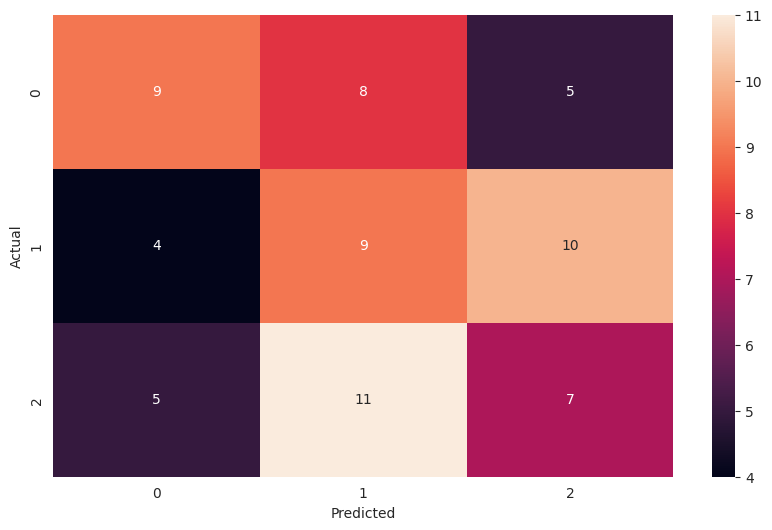

              precision    recall  f1-score   support

     class 0       0.63      0.77      0.69        22
     class 1       0.61      0.61      0.61        23
     class 2       0.56      0.43      0.49        23

    accuracy                           0.60        68
   macro avg       0.60      0.61      0.60        68
weighted avg       0.60      0.60      0.60        68



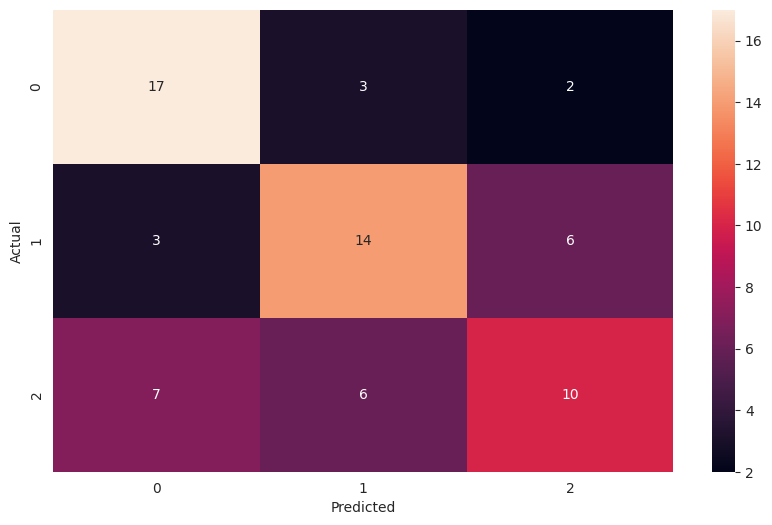

              precision    recall  f1-score   support

     class 0       0.50      0.59      0.54        22
     class 1       0.68      0.65      0.67        23
     class 2       0.65      0.57      0.60        23

    accuracy                           0.60        68
   macro avg       0.61      0.60      0.60        68
weighted avg       0.61      0.60      0.61        68



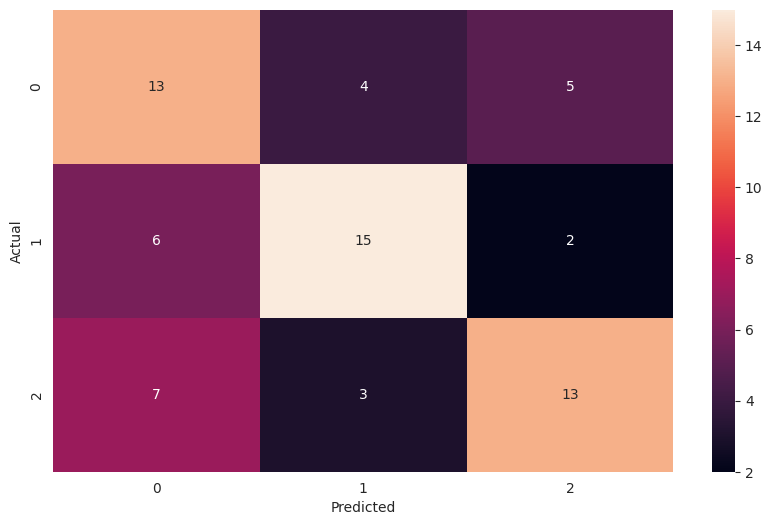

              precision    recall  f1-score   support

     class 0       0.38      0.41      0.39        22
     class 1       0.61      0.61      0.61        23
     class 2       0.33      0.30      0.32        23

    accuracy                           0.44        68
   macro avg       0.44      0.44      0.44        68
weighted avg       0.44      0.44      0.44        68



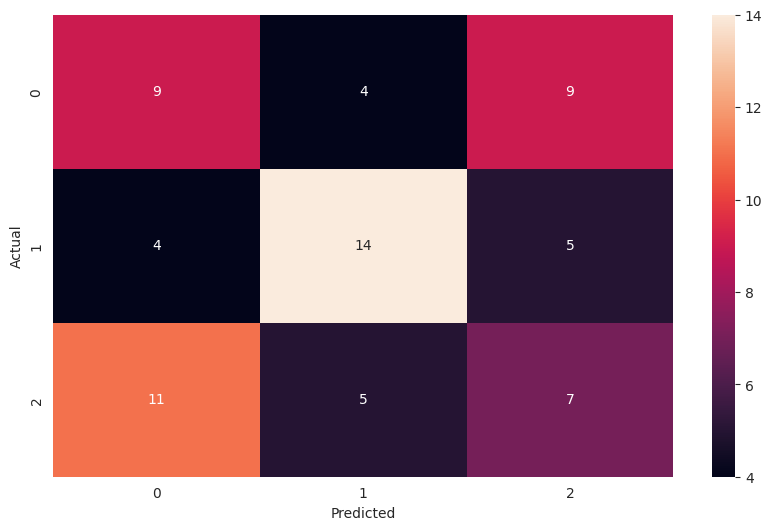

              precision    recall  f1-score   support

     class 0       0.56      0.41      0.47        22
     class 1       0.63      0.52      0.57        23
     class 2       0.45      0.65      0.54        23

    accuracy                           0.53        68
   macro avg       0.55      0.53      0.53        68
weighted avg       0.55      0.53      0.53        68



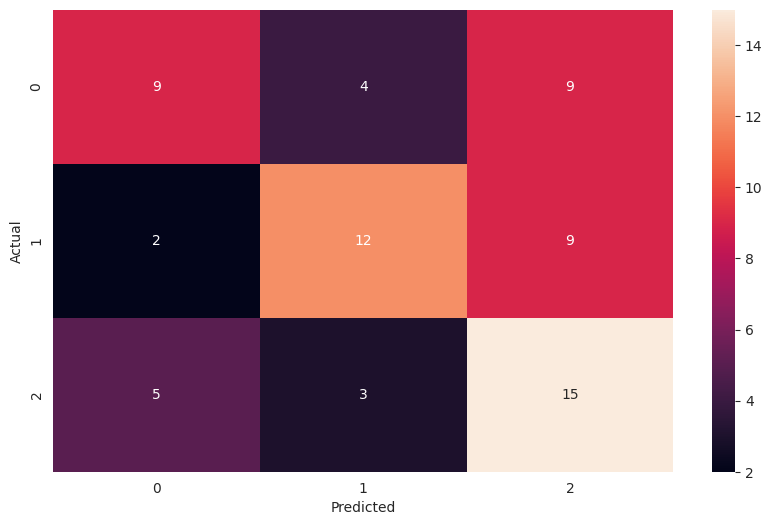

              precision    recall  f1-score   support

     class 0       0.72      0.78      0.75        23
     class 1       0.61      0.61      0.61        23
     class 2       0.65      0.59      0.62        22

    accuracy                           0.66        68
   macro avg       0.66      0.66      0.66        68
weighted avg       0.66      0.66      0.66        68



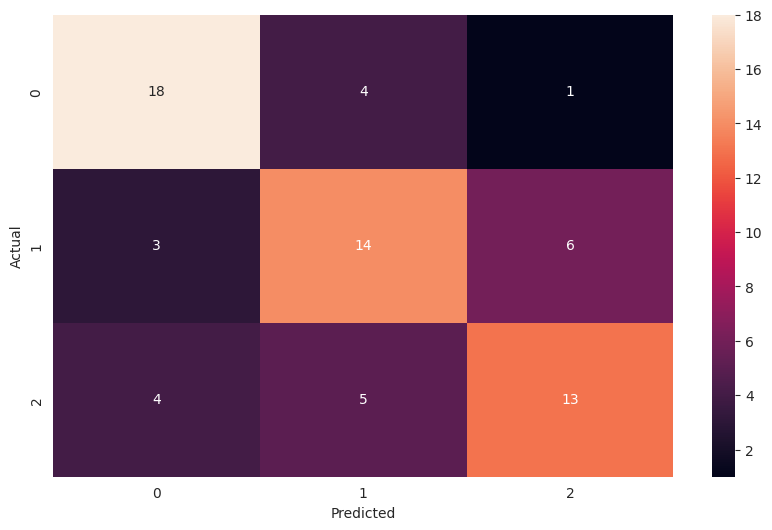

              precision    recall  f1-score   support

     class 0       0.61      0.48      0.54        23
     class 1       0.50      0.61      0.55        23
     class 2       0.50      0.50      0.50        22

    accuracy                           0.53        68
   macro avg       0.54      0.53      0.53        68
weighted avg       0.54      0.53      0.53        68



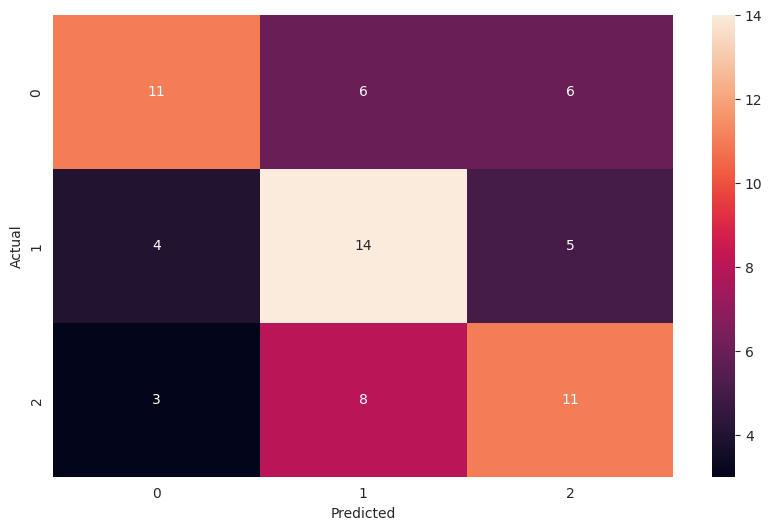

              precision    recall  f1-score   support

     class 0       0.62      0.57      0.59        23
     class 1       0.63      0.52      0.57        23
     class 2       0.50      0.64      0.56        22

    accuracy                           0.57        68
   macro avg       0.58      0.57      0.57        68
weighted avg       0.58      0.57      0.57        68



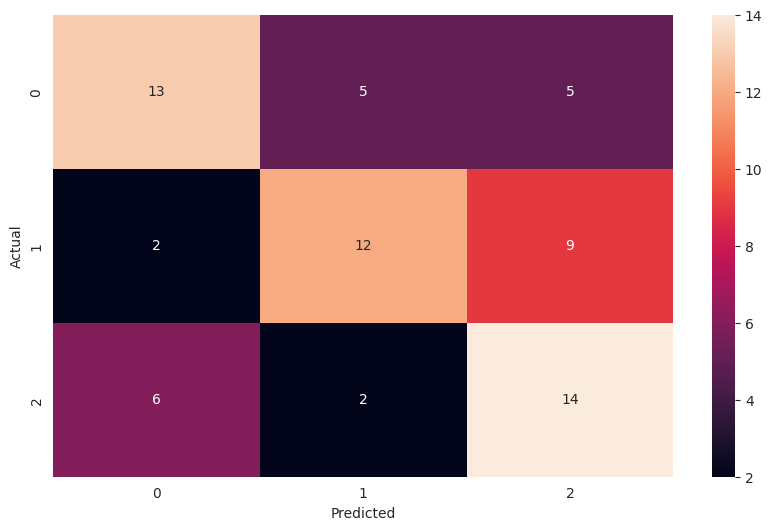

              precision    recall  f1-score   support

     class 0       0.57      0.74      0.64        23
     class 1       0.65      0.74      0.69        23
     class 2       0.58      0.32      0.41        22

    accuracy                           0.60        68
   macro avg       0.60      0.60      0.58        68
weighted avg       0.60      0.60      0.58        68



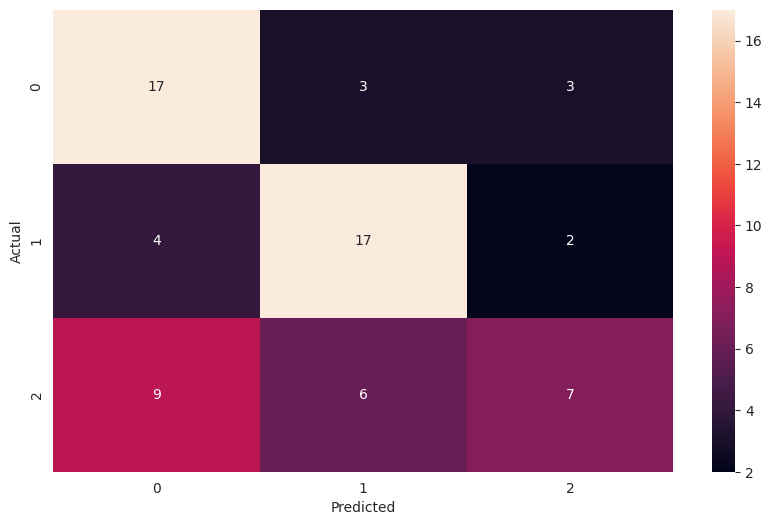

              precision    recall  f1-score   support

     class 0       0.44      0.35      0.39        23
     class 1       0.43      0.43      0.43        23
     class 2       0.44      0.55      0.49        22

    accuracy                           0.44        68
   macro avg       0.44      0.44      0.44        68
weighted avg       0.44      0.44      0.44        68



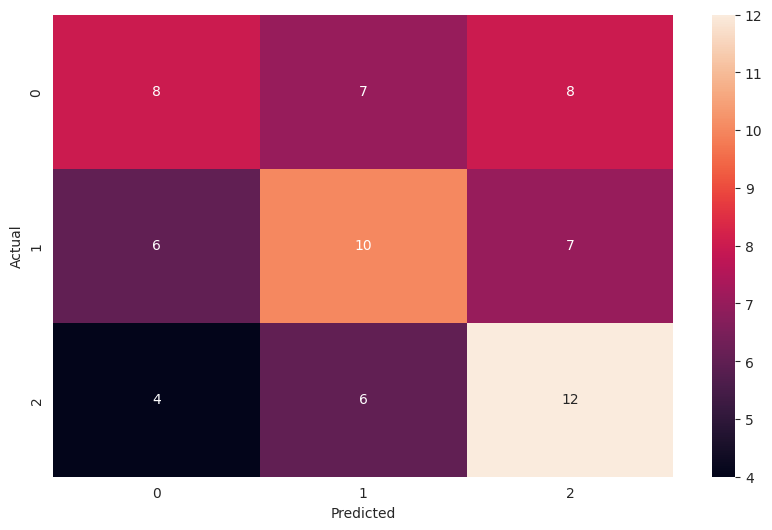

[36.76470588235294, 60.29411764705882, 60.29411764705882, 44.11764705882353, 52.94117647058824, 66.17647058823529, 52.94117647058824, 57.35294117647059, 60.29411764705882, 44.11764705882353]
CV Accuracy Score: 53.53% (+/- 8.78%)
CV  F1 Score: 53.24% (+/- 8.60%)
CV  Precision Score: 54.02% (+/- 8.64%)


In [ ]:
skf = StratifiedKFold(n_splits=10,shuffle=True, random_state=12)
cv_acc_scores =[]
cv_f1_scores =[]
cv_precision_scores =[]
X= finalDf[['PC1', 'PC2','PC3', 'PC4','PC5', 'PC6','PC7', 'PC8','PC9', 'PC10','PC11', 'PC12','PC13', 'PC14','PC15', 'PC16','PC17', 'PC18','PC19', 'PC20']]
y=finalDf['Hired3C']
for train_index, test_index in skf.split(X, y):


    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]


    acc,f1,precision = CreateModel(X_train, X_test, y_train, y_test)


    cv_acc_scores.append(acc*100)
    cv_f1_scores.append(f1*100)
    cv_precision_scores.append(precision*100)

print(cv_acc_scores )
print("CV Accuracy Score: %.2f%% (+/- %.2f%%)" % (np.mean(cv_acc_scores), np.std(cv_acc_scores)))
print("CV  F1 Score: %.2f%% (+/- %.2f%%)" % (np.mean(cv_f1_scores), np.std(cv_f1_scores)))
print("CV  Precision Score: %.2f%% (+/- %.2f%%)" % (np.mean(cv_precision_scores), np.std(cv_precision_scores)))


## Random Forest

In [71]:
from sklearn.ensemble import RandomForestClassifier

In [72]:
def CreateModel( X_train, X_test, y_train, y_test):
    y_21_test = []
    for i in y_test:
        if(i == 2):
            y_21_test.append(2)
        else:
            y_21_test.append(1)

    y_21_train = []
    for i in y_train:
        if(i == 2):
            y_21_train.append(2)
        else:
            y_21_train.append(1)

    X = X_train
    y = y_21_train
    clf =RandomForestClassifier(n_estimators=600)
    clf.fit(X, y)
    clf.score(X, y)

    y_21_predict=clf.predict(X_test)
    target_names = ['class 2', 'class 1']


    X_10_train = X_train.loc[y_train!= 2]

    X_10_test = X_test.loc[y_test!= 2]

    y_10_train= []
    for i in y_train:
        if(i != 2):
            y_10_train.append(i)


    y_10_test = []
    for i in y_test:
        if(i != 2):
            y_10_test.append(i)

    X = X_10_train
    y = y_10_train
    clf = RandomForestClassifier(n_estimators=600)
    clf.fit(X, y)
    clf.score(X, y)
    y_10_predict = clf.predict(X_10_test)
    target_names = ['class 1', 'class 0']
    #print(classification_report(y_10_test,y_10_predict ,target_names=target_names, zero_division=0))

    y1=list(y_test)
    y2=list(y_21_predict)
    y3=list(y_10_predict)
    combined_Predictions = []
    k=0
    for (i,j) in zip(y1,y2):
        if(i!=2):
            combined_Predictions.append(y3[k])
            k=k+1
        else:
            combined_Predictions.append(j)
    target_names = ['class 0', 'class 1', 'class 2']
    print(classification_report(y_test,combined_Predictions ,target_names=target_names, zero_division=0))

    plt.figure(figsize = (10,6))
    sns.heatmap(confusion_matrix(y_test, combined_Predictions), annot = True,fmt='d')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

   # metrics.plot_roc_curve(clf, X_test, y_test)

    acc = accuracy_score(y_test, combined_Predictions, normalize=True)
    f1 =  f1_score(y_test, combined_Predictions, average='weighted')
    precision = precision_score(y_test, combined_Predictions,average='micro')


    return acc,f1,precision


              precision    recall  f1-score   support

     class 0       0.68      0.68      0.68        22
     class 1       0.39      0.70      0.50        23
     class 2       1.00      0.22      0.36        23

    accuracy                           0.53        68
   macro avg       0.69      0.53      0.51        68
weighted avg       0.69      0.53      0.51        68



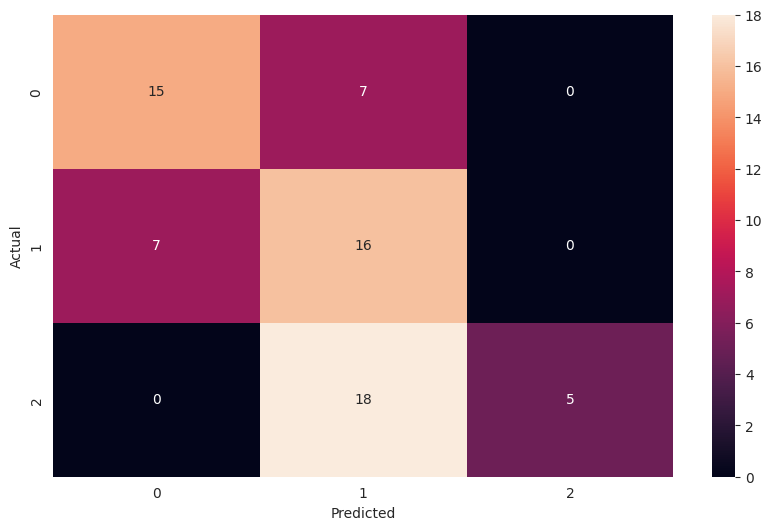

              precision    recall  f1-score   support

     class 0       0.83      0.86      0.84        22
     class 1       0.50      0.83      0.62        23
     class 2       1.00      0.30      0.47        23

    accuracy                           0.66        68
   macro avg       0.78      0.66      0.64        68
weighted avg       0.77      0.66      0.64        68



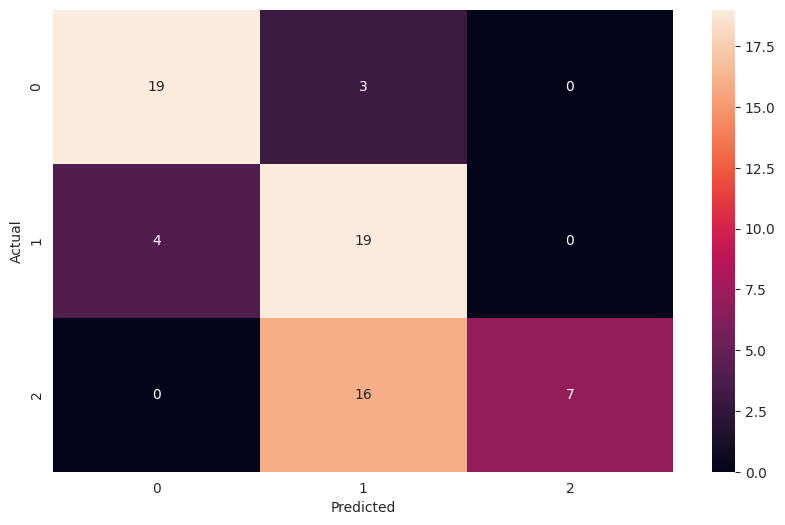

              precision    recall  f1-score   support

     class 0       0.73      0.86      0.79        22
     class 1       0.46      0.70      0.55        23
     class 2       1.00      0.30      0.47        23

    accuracy                           0.62        68
   macro avg       0.73      0.62      0.60        68
weighted avg       0.73      0.62      0.60        68



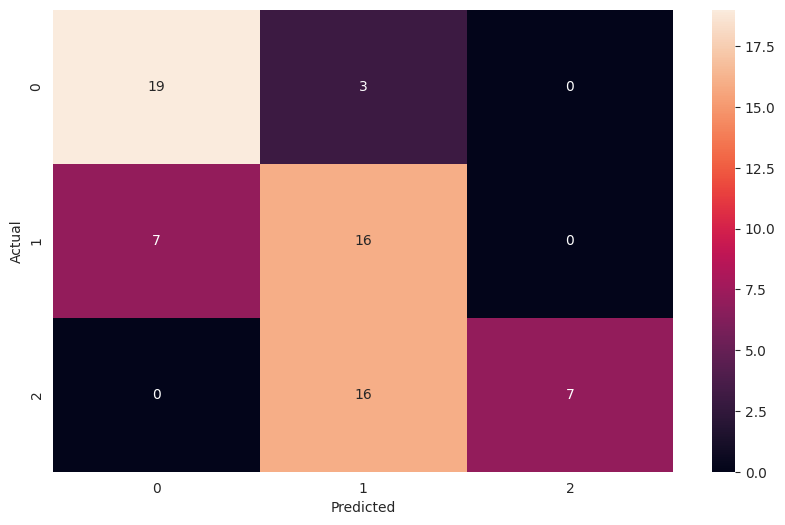

              precision    recall  f1-score   support

     class 0       0.78      0.64      0.70        22
     class 1       0.44      0.83      0.58        23
     class 2       1.00      0.30      0.47        23

    accuracy                           0.59        68
   macro avg       0.74      0.59      0.58        68
weighted avg       0.74      0.59      0.58        68



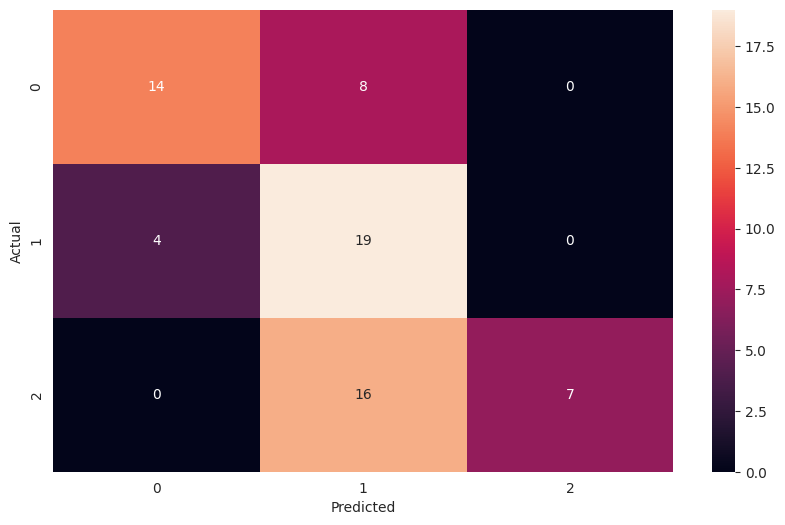

              precision    recall  f1-score   support

     class 0       0.76      0.86      0.81        22
     class 1       0.46      0.74      0.57        23
     class 2       1.00      0.26      0.41        23

    accuracy                           0.62        68
   macro avg       0.74      0.62      0.60        68
weighted avg       0.74      0.62      0.59        68



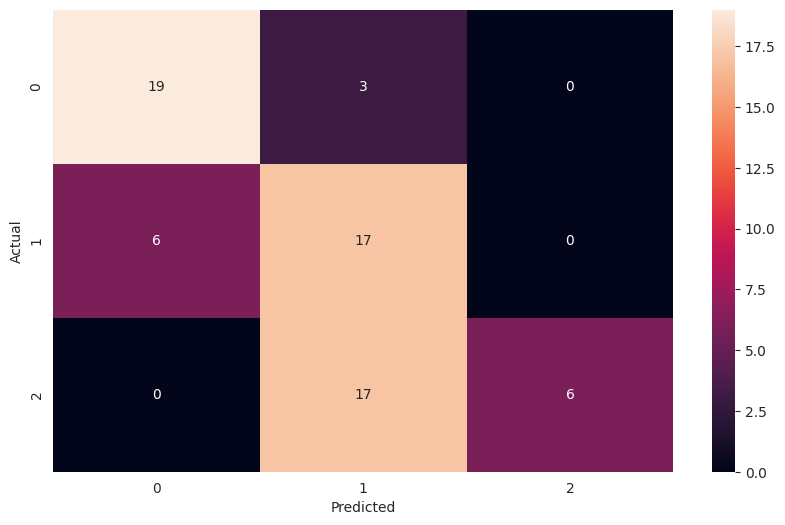

              precision    recall  f1-score   support

     class 0       0.72      0.78      0.75        23
     class 1       0.43      0.70      0.53        23
     class 2       1.00      0.27      0.43        22

    accuracy                           0.59        68
   macro avg       0.72      0.58      0.57        68
weighted avg       0.71      0.59      0.57        68



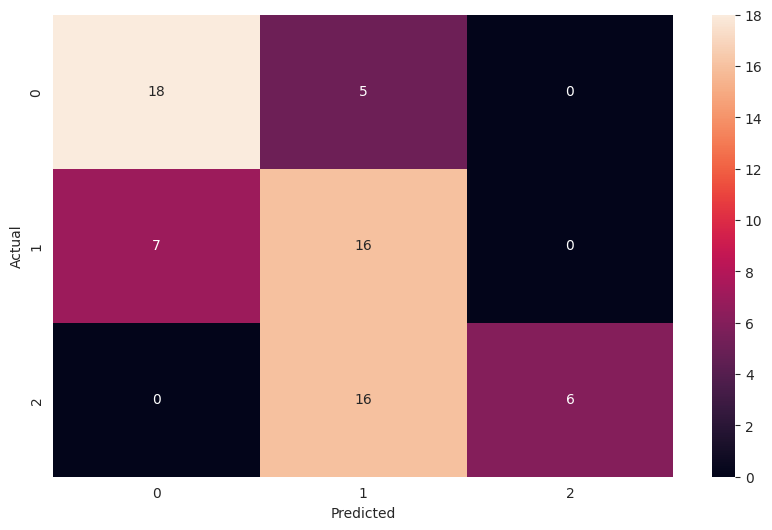

              precision    recall  f1-score   support

     class 0       0.83      0.83      0.83        23
     class 1       0.51      0.83      0.63        23
     class 2       1.00      0.36      0.53        22

    accuracy                           0.68        68
   macro avg       0.78      0.67      0.66        68
weighted avg       0.78      0.68      0.67        68



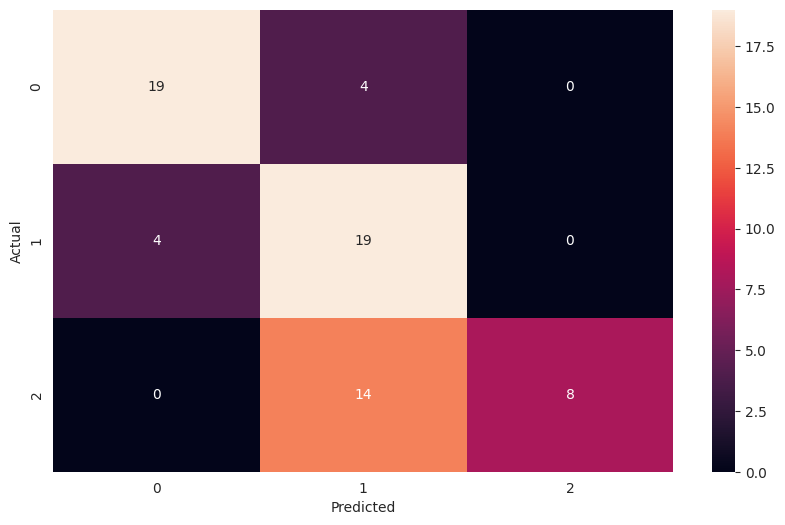

              precision    recall  f1-score   support

     class 0       0.81      0.74      0.77        23
     class 1       0.47      0.83      0.60        23
     class 2       1.00      0.32      0.48        22

    accuracy                           0.63        68
   macro avg       0.76      0.63      0.62        68
weighted avg       0.76      0.63      0.62        68



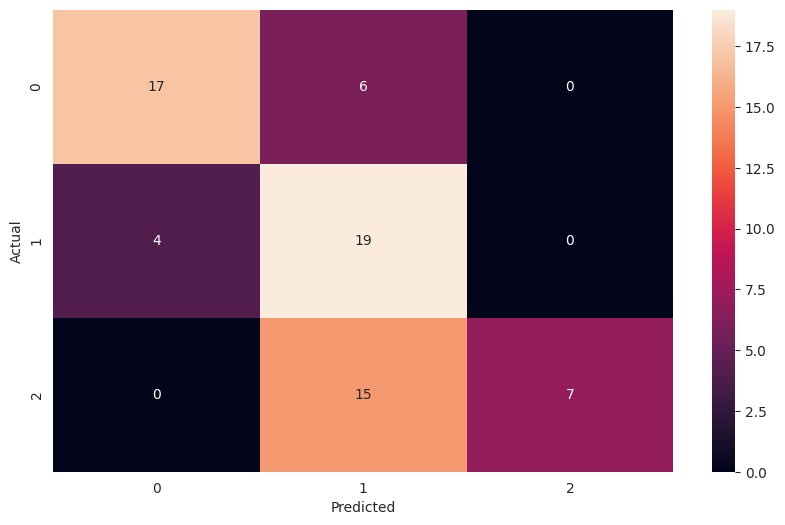

              precision    recall  f1-score   support

     class 0       0.77      0.87      0.82        23
     class 1       0.44      0.74      0.55        23
     class 2       1.00      0.14      0.24        22

    accuracy                           0.59        68
   macro avg       0.74      0.58      0.53        68
weighted avg       0.73      0.59      0.54        68



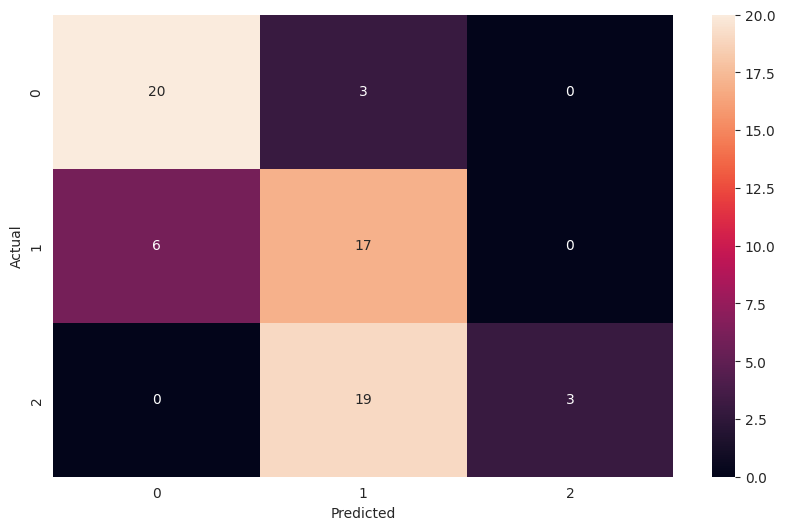

              precision    recall  f1-score   support

     class 0       0.70      0.70      0.70        23
     class 1       0.43      0.70      0.53        23
     class 2       1.00      0.36      0.53        22

    accuracy                           0.59        68
   macro avg       0.71      0.58      0.59        68
weighted avg       0.71      0.59      0.59        68



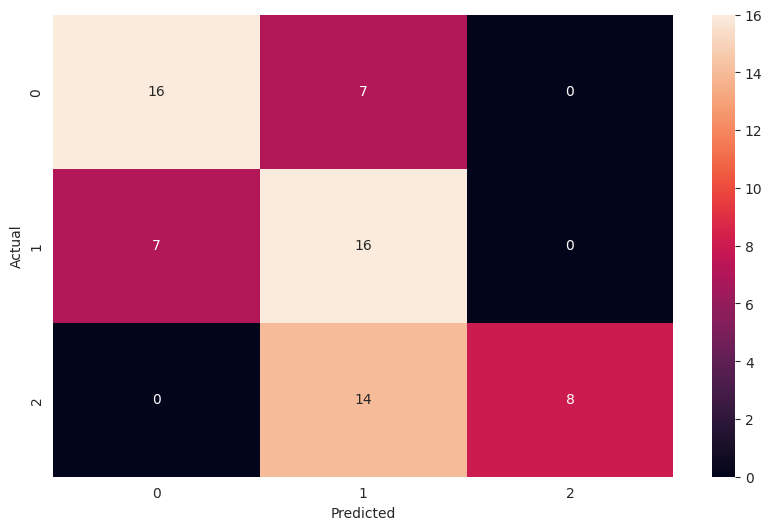

[52.94117647058824, 66.17647058823529, 61.76470588235294, 58.82352941176471, 61.76470588235294, 58.82352941176471, 67.64705882352942, 63.23529411764706, 58.82352941176471, 58.82352941176471]
CV Accuracy Score: 60.88% (+/- 4.01%)
CV  F1 Score: 59.13% (+/- 4.35%)
CV  Precision Score: 60.88% (+/- 4.01%)


In [73]:
skf = StratifiedKFold(n_splits=10,shuffle=True, random_state=12)
cv_acc_scores =[]
cv_f1_scores =[]
cv_precision_scores =[]
X= finalDf[['PC1', 'PC2','PC3', 'PC4','PC5', 'PC6','PC7', 'PC8','PC9', 'PC10','PC11', 'PC12','PC13', 'PC14','PC15', 'PC16','PC17', 'PC18','PC19', 'PC20']]
y=finalDf['Hired3C']
for train_index, test_index in skf.split(X, y):


    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]


    acc,f1,precision = CreateModel( X_train, X_test, y_train, y_test)


    cv_acc_scores.append(acc*100)
    cv_f1_scores.append(f1*100)
    cv_precision_scores.append(precision*100)

print(cv_acc_scores )
print("CV Accuracy Score: %.2f%% (+/- %.2f%%)" % (np.mean(cv_acc_scores), np.std(cv_acc_scores)))
print("CV  F1 Score: %.2f%% (+/- %.2f%%)" % (np.mean(cv_f1_scores), np.std(cv_f1_scores)))
print("CV  Precision Score: %.2f%% (+/- %.2f%%)" % (np.mean(cv_precision_scores), np.std(cv_precision_scores)))


## SVM

In [74]:
from sklearn.svm import SVC

In [75]:
def CreateModel( X_train, X_test, y_train, y_test):
    y_21_test = []
    for i in y_test:
        if(i == 2):
            y_21_test.append(2)
        else:
            y_21_test.append(1)

    y_21_train = []
    for i in y_train:
        if(i == 2):
            y_21_train.append(2)
        else:
            y_21_train.append(1)

    X = X_train
    y = y_21_train
    clf = SVC(probability=True)
    clf.fit(X, y)
    clf.score(X, y)

    y_21_predict=clf.predict(X_test)
    target_names = ['class 2', 'class 1']
    print(classification_report(y_21_test,y_21_predict,target_names=target_names, zero_division=0))

    X_10_train = X_train.loc[y_train!= 2]

    X_10_test = X_test.loc[y_test!= 2]


    y_10_train= []
    for i in y_train:
        if(i != 2):
            y_10_train.append(i)


    y_10_test = []
    for i in y_test:
        if(i != 2):
            y_10_test.append(i)

    X = X_10_train
    y = y_10_train
    clf =  SVC(probability=True)
    clf.fit(X, y)
    clf.score(X, y)
    y_10_predict = clf.predict(X_10_test)
    target_names = ['class 1', 'class 0']
    print(classification_report(y_10_test,y_10_predict ,target_names=target_names, zero_division=0))

    y1=list(y_test)
    y2=list(y_21_predict)
    y3=list(y_10_predict)
    combined_Predictions = []
    k=0
    for (i,j) in zip(y1,y2):
        if(i!=2):
            combined_Predictions.append(y3[k])
            k=k+1
        else:
            combined_Predictions.append(j)
    target_names = ['class 0', 'class 1', 'class 2']
    print(classification_report(y_test,combined_Predictions ,target_names=target_names, zero_division=0))
    acc = accuracy_score(y_test, combined_Predictions, normalize=True)


    plt.figure(figsize = (10,6))
    sns.heatmap(confusion_matrix(y_test, combined_Predictions), annot = True,fmt='d')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

   # metrics.plot_roc_curve(clf, X_test, y_test)

    acc = accuracy_score(y_test, combined_Predictions, normalize=True)
    f1 =  f1_score(y_test, combined_Predictions, average='weighted')
    precision = precision_score(y_test, combined_Predictions,average='micro')


    return acc,f1,precision

    return acc


              precision    recall  f1-score   support

     class 2       0.69      0.93      0.79        45
     class 1       0.57      0.17      0.27        23

    accuracy                           0.68        68
   macro avg       0.63      0.55      0.53        68
weighted avg       0.65      0.68      0.61        68

              precision    recall  f1-score   support

     class 1       0.67      0.73      0.70        22
     class 0       0.71      0.65      0.68        23

    accuracy                           0.69        45
   macro avg       0.69      0.69      0.69        45
weighted avg       0.69      0.69      0.69        45

              precision    recall  f1-score   support

     class 0       0.67      0.73      0.70        22
     class 1       0.38      0.65      0.48        23
     class 2       1.00      0.17      0.30        23

    accuracy                           0.51        68
   macro avg       0.68      0.52      0.49        68
weighted avg       0

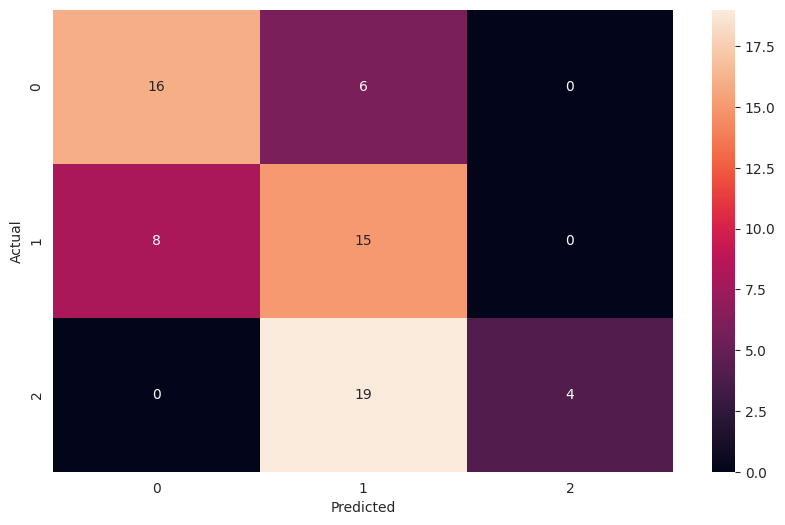

              precision    recall  f1-score   support

     class 2       0.73      0.98      0.84        45
     class 1       0.88      0.30      0.45        23

    accuracy                           0.75        68
   macro avg       0.80      0.64      0.64        68
weighted avg       0.78      0.75      0.71        68

              precision    recall  f1-score   support

     class 1       0.79      0.86      0.83        22
     class 0       0.86      0.78      0.82        23

    accuracy                           0.82        45
   macro avg       0.82      0.82      0.82        45
weighted avg       0.83      0.82      0.82        45

              precision    recall  f1-score   support

     class 0       0.79      0.86      0.83        22
     class 1       0.49      0.78      0.60        23
     class 2       1.00      0.30      0.47        23

    accuracy                           0.65        68
   macro avg       0.76      0.65      0.63        68
weighted avg       0

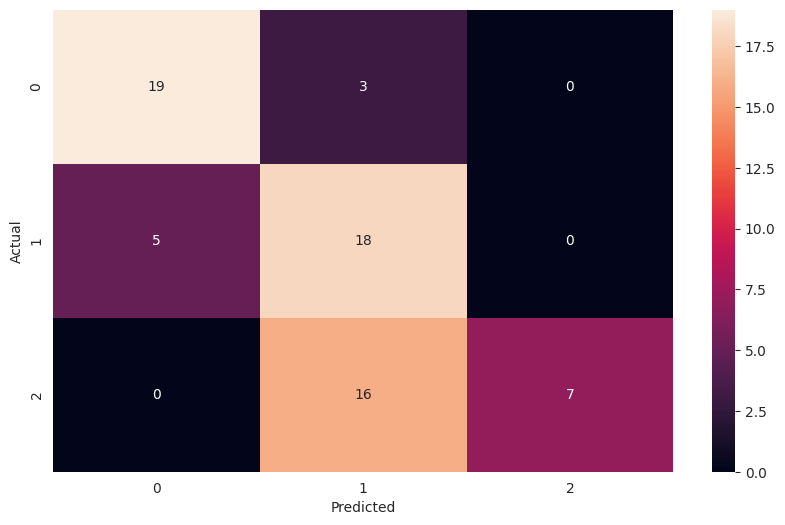

              precision    recall  f1-score   support

     class 2       0.68      0.96      0.80        45
     class 1       0.60      0.13      0.21        23

    accuracy                           0.68        68
   macro avg       0.64      0.54      0.51        68
weighted avg       0.65      0.68      0.60        68

              precision    recall  f1-score   support

     class 1       0.79      0.86      0.83        22
     class 0       0.86      0.78      0.82        23

    accuracy                           0.82        45
   macro avg       0.82      0.82      0.82        45
weighted avg       0.83      0.82      0.82        45

              precision    recall  f1-score   support

     class 0       0.79      0.86      0.83        22
     class 1       0.44      0.78      0.56        23
     class 2       1.00      0.13      0.23        23

    accuracy                           0.59        68
   macro avg       0.74      0.59      0.54        68
weighted avg       0

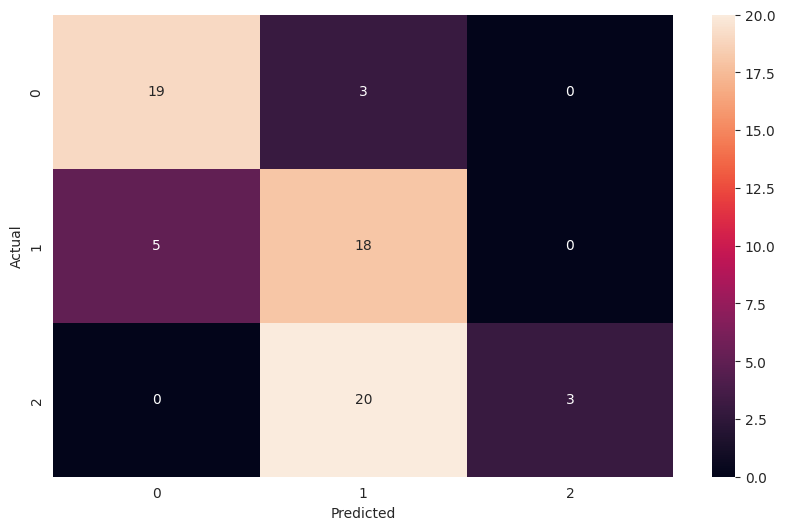

              precision    recall  f1-score   support

     class 2       0.68      1.00      0.81        45
     class 1       1.00      0.09      0.16        23

    accuracy                           0.69        68
   macro avg       0.84      0.54      0.49        68
weighted avg       0.79      0.69      0.59        68

              precision    recall  f1-score   support

     class 1       0.76      0.73      0.74        22
     class 0       0.75      0.78      0.77        23

    accuracy                           0.76        45
   macro avg       0.76      0.75      0.76        45
weighted avg       0.76      0.76      0.76        45

              precision    recall  f1-score   support

     class 0       0.76      0.73      0.74        22
     class 1       0.40      0.78      0.53        23
     class 2       1.00      0.09      0.16        23

    accuracy                           0.53        68
   macro avg       0.72      0.53      0.48        68
weighted avg       0

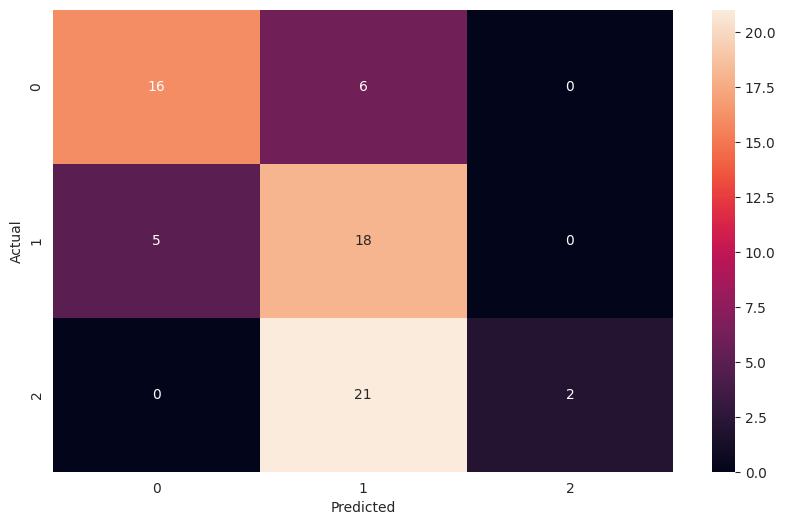

              precision    recall  f1-score   support

     class 2       0.69      0.91      0.79        45
     class 1       0.56      0.22      0.31        23

    accuracy                           0.68        68
   macro avg       0.63      0.56      0.55        68
weighted avg       0.65      0.68      0.63        68

              precision    recall  f1-score   support

     class 1       0.68      0.77      0.72        22
     class 0       0.75      0.65      0.70        23

    accuracy                           0.71        45
   macro avg       0.72      0.71      0.71        45
weighted avg       0.72      0.71      0.71        45

              precision    recall  f1-score   support

     class 0       0.68      0.77      0.72        22
     class 1       0.39      0.65      0.49        23
     class 2       1.00      0.22      0.36        23

    accuracy                           0.54        68
   macro avg       0.69      0.55      0.52        68
weighted avg       0

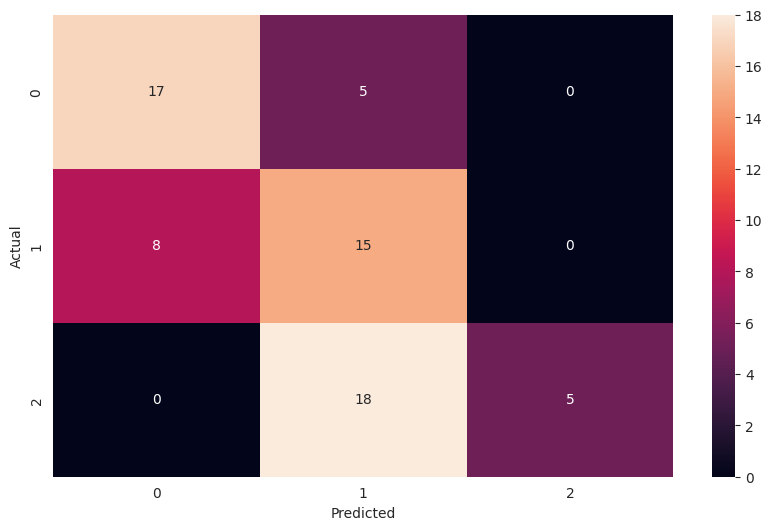

              precision    recall  f1-score   support

     class 2       0.75      0.96      0.84        46
     class 1       0.78      0.32      0.45        22

    accuracy                           0.75        68
   macro avg       0.76      0.64      0.64        68
weighted avg       0.76      0.75      0.71        68

              precision    recall  f1-score   support

     class 1       0.78      0.91      0.84        23
     class 0       0.89      0.74      0.81        23

    accuracy                           0.83        46
   macro avg       0.84      0.83      0.82        46
weighted avg       0.84      0.83      0.82        46

              precision    recall  f1-score   support

     class 0       0.78      0.91      0.84        23
     class 1       0.50      0.74      0.60        23
     class 2       1.00      0.32      0.48        22

    accuracy                           0.66        68
   macro avg       0.76      0.66      0.64        68
weighted avg       0

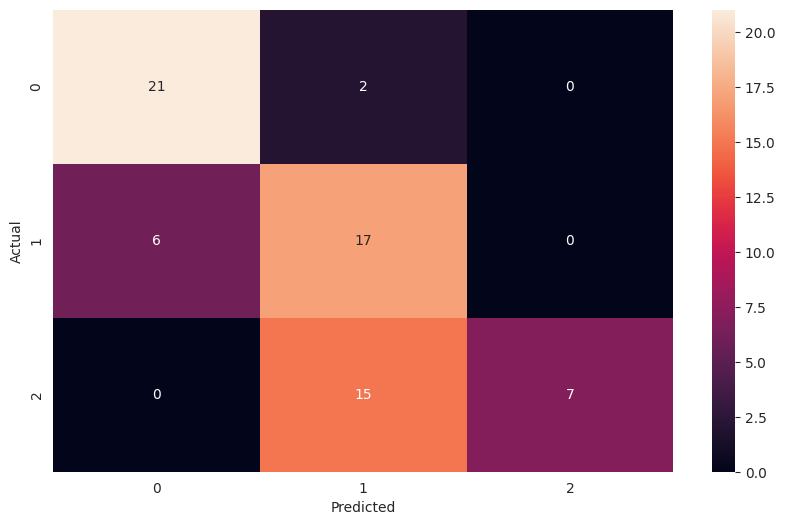

              precision    recall  f1-score   support

     class 2       0.70      0.91      0.79        46
     class 1       0.50      0.18      0.27        22

    accuracy                           0.68        68
   macro avg       0.60      0.55      0.53        68
weighted avg       0.64      0.68      0.62        68

              precision    recall  f1-score   support

     class 1       0.86      0.83      0.84        23
     class 0       0.83      0.87      0.85        23

    accuracy                           0.85        46
   macro avg       0.85      0.85      0.85        46
weighted avg       0.85      0.85      0.85        46

              precision    recall  f1-score   support

     class 0       0.86      0.83      0.84        23
     class 1       0.48      0.87      0.62        23
     class 2       1.00      0.18      0.31        22

    accuracy                           0.63        68
   macro avg       0.78      0.63      0.59        68
weighted avg       0

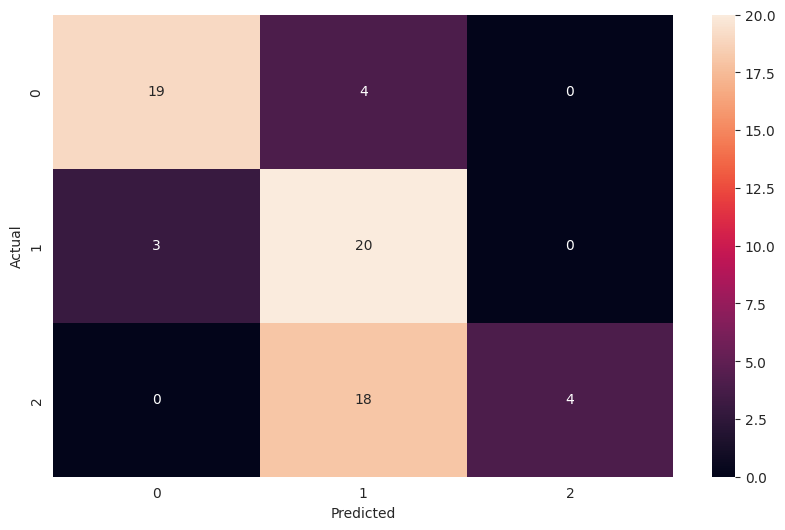

              precision    recall  f1-score   support

     class 2       0.74      0.98      0.84        46
     class 1       0.86      0.27      0.41        22

    accuracy                           0.75        68
   macro avg       0.80      0.63      0.63        68
weighted avg       0.78      0.75      0.70        68

              precision    recall  f1-score   support

     class 1       0.79      0.96      0.86        23
     class 0       0.94      0.74      0.83        23

    accuracy                           0.85        46
   macro avg       0.87      0.85      0.85        46
weighted avg       0.87      0.85      0.85        46

              precision    recall  f1-score   support

     class 0       0.79      0.96      0.86        23
     class 1       0.50      0.74      0.60        23
     class 2       1.00      0.27      0.43        22

    accuracy                           0.66        68
   macro avg       0.76      0.66      0.63        68
weighted avg       0

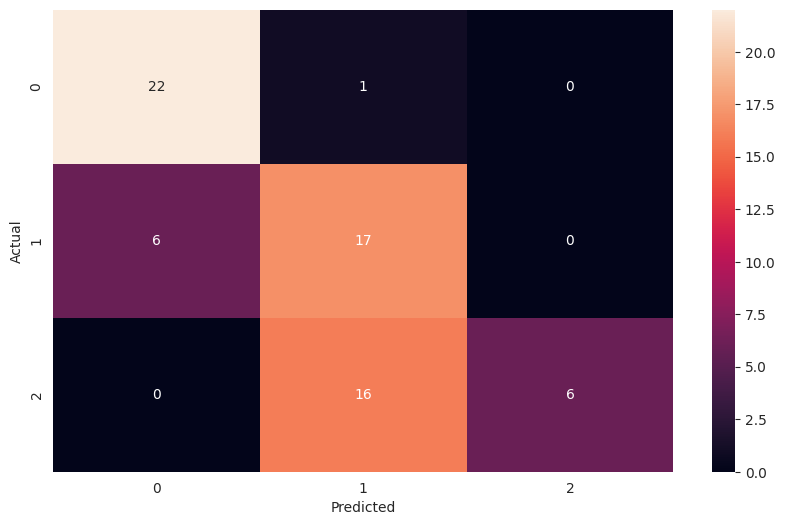

              precision    recall  f1-score   support

     class 2       0.70      0.98      0.82        46
     class 1       0.75      0.14      0.23        22

    accuracy                           0.71        68
   macro avg       0.73      0.56      0.52        68
weighted avg       0.72      0.71      0.63        68

              precision    recall  f1-score   support

     class 1       0.77      0.87      0.82        23
     class 0       0.85      0.74      0.79        23

    accuracy                           0.80        46
   macro avg       0.81      0.80      0.80        46
weighted avg       0.81      0.80      0.80        46

              precision    recall  f1-score   support

     class 0       0.77      0.87      0.82        23
     class 1       0.44      0.74      0.55        23
     class 2       1.00      0.14      0.24        22

    accuracy                           0.59        68
   macro avg       0.74      0.58      0.53        68
weighted avg       0

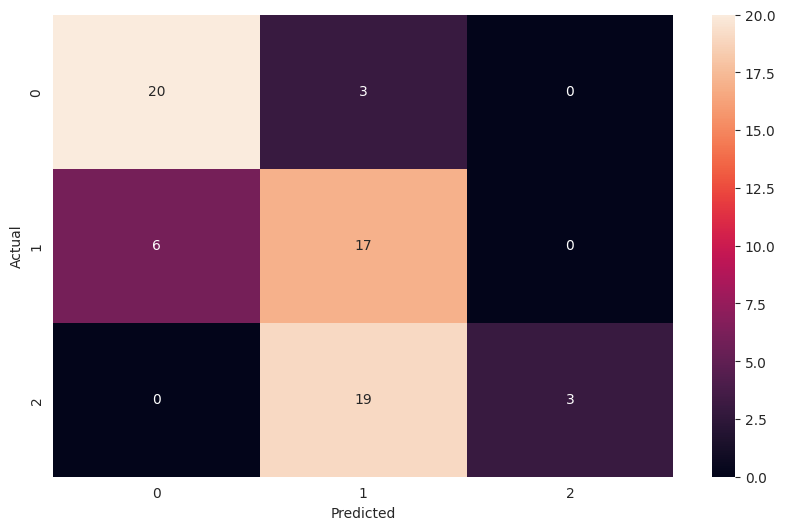

              precision    recall  f1-score   support

     class 2       0.74      0.93      0.83        46
     class 1       0.70      0.32      0.44        22

    accuracy                           0.74        68
   macro avg       0.72      0.63      0.63        68
weighted avg       0.73      0.74      0.70        68

              precision    recall  f1-score   support

     class 1       0.77      0.87      0.82        23
     class 0       0.85      0.74      0.79        23

    accuracy                           0.80        46
   macro avg       0.81      0.80      0.80        46
weighted avg       0.81      0.80      0.80        46

              precision    recall  f1-score   support

     class 0       0.77      0.87      0.82        23
     class 1       0.49      0.74      0.59        23
     class 2       1.00      0.32      0.48        22

    accuracy                           0.65        68
   macro avg       0.75      0.64      0.63        68
weighted avg       0

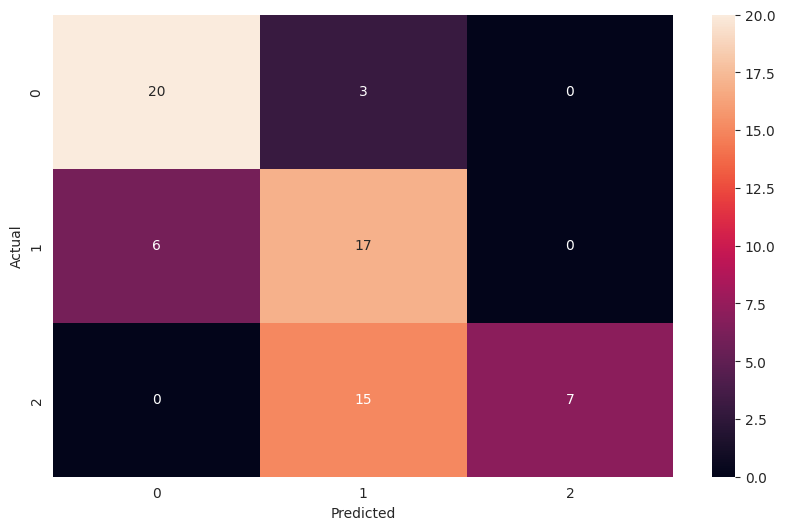

[51.470588235294116, 64.70588235294117, 58.82352941176471, 52.94117647058824, 54.41176470588235, 66.17647058823529, 63.23529411764706, 66.17647058823529, 58.82352941176471, 64.70588235294117]
CV Accuracy Score: 60.15% (+/- 5.36%)
CV  F1 Score: 56.83% (+/- 6.11%)
CV  Precision Score: 60.15% (+/- 5.36%)


In [76]:
skf = StratifiedKFold(n_splits=10,shuffle=True, random_state=12)
cv_acc_scores =[]
cv_f1_scores =[]
cv_precision_scores =[]

X= finalDf[['PC1', 'PC2','PC3', 'PC4','PC5', 'PC6','PC7', 'PC8','PC9', 'PC10','PC11', 'PC12','PC13', 'PC14','PC15', 'PC16','PC17', 'PC18','PC19', 'PC20']]
y=finalDf['Hired3C']
for train_index, test_index in skf.split(X, y):


    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]

    acc,f1,precision = CreateModel( X_train, X_test, y_train, y_test)


    cv_acc_scores.append(acc*100)
    cv_f1_scores.append(f1*100)
    cv_precision_scores.append(precision*100)

print(cv_acc_scores )
print("CV Accuracy Score: %.2f%% (+/- %.2f%%)" % (np.mean(cv_acc_scores), np.std(cv_acc_scores)))
print("CV  F1 Score: %.2f%% (+/- %.2f%%)" % (np.mean(cv_f1_scores), np.std(cv_f1_scores)))
print("CV  Precision Score: %.2f%% (+/- %.2f%%)" % (np.mean(cv_precision_scores), np.std(cv_precision_scores)))


## Decision Trees

In [80]:
from sklearn.tree import DecisionTreeClassifier

def CreateModel(X_train, X_test, y_train, y_test):
    y_21_test = [2 if i == 2 else 1 for i in y_test]
    y_21_train = [2 if i == 2 else 1 for i in y_train]

    X = X_train
    y = y_21_train
    clf = DecisionTreeClassifier(random_state=0)  # Using Decision Tree
    clf.fit(X, y)
    clf.score(X, y)
    y_21_predict = clf.predict(X_test)
    target_names = ['class 2', 'class 1']
    print(classification_report(y_21_test, y_21_predict, target_names=target_names, zero_division=0))

    X_10_train = X_train.loc[y_train != 2]
    X_10_test = X_test.loc[y_test != 2]


    y_10_train = [i for i in y_train if i != 2]


    y_10_test = [i for i in y_test if i != 2]

    X = X_10_train
    y = y_10_train
    clf = DecisionTreeClassifier(random_state=0)  # Using Decision Tree
    clf.fit(X, y)
    clf.score(X, y)
    y_10_predict = clf.predict(X_10_test)
    target_names = ['class 1', 'class 0']
    print(classification_report(y_10_test, y_10_predict, target_names=target_names, zero_division=0))

    y1 = list(y_test)
    y2 = list(y_21_predict)
    y3 = list(y_10_predict)
    combined_Predictions = []
    k = 0
    for (i, j) in zip(y1, y2):
        if i != 2:
            combined_Predictions.append(y3[k])
            k += 1
        else:
            combined_Predictions.append(j)
    target_names = ['class 0', 'class 1', 'class 2']
    print(classification_report(y_test, combined_Predictions, target_names=target_names, zero_division=0))

    plt.figure(figsize=(10, 6))
    sns.heatmap(confusion_matrix(y_test, combined_Predictions), annot=True, fmt='d')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

    acc = accuracy_score(y_test, combined_Predictions, normalize=True)
    f1 = f1_score(y_test, combined_Predictions, average='weighted')
    precision = precision_score(y_test, combined_Predictions, average='micro')

    return acc, f1, precision


              precision    recall  f1-score   support

     class 2       0.74      0.71      0.73        45
     class 1       0.48      0.52      0.50        23

    accuracy                           0.65        68
   macro avg       0.61      0.62      0.61        68
weighted avg       0.65      0.65      0.65        68

              precision    recall  f1-score   support

     class 1       0.68      0.68      0.68        22
     class 0       0.70      0.70      0.70        23

    accuracy                           0.69        45
   macro avg       0.69      0.69      0.69        45
weighted avg       0.69      0.69      0.69        45

              precision    recall  f1-score   support

     class 0       0.68      0.68      0.68        22
     class 1       0.47      0.70      0.56        23
     class 2       1.00      0.52      0.69        23

    accuracy                           0.63        68
   macro avg       0.72      0.63      0.64        68
weighted avg       0

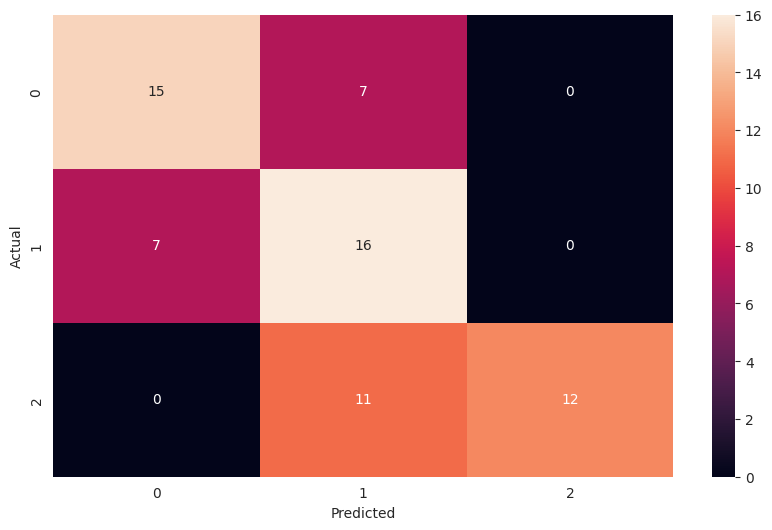

              precision    recall  f1-score   support

     class 2       0.76      0.71      0.74        45
     class 1       0.50      0.57      0.53        23

    accuracy                           0.66        68
   macro avg       0.63      0.64      0.63        68
weighted avg       0.67      0.66      0.67        68

              precision    recall  f1-score   support

     class 1       0.62      0.59      0.60        22
     class 0       0.62      0.65      0.64        23

    accuracy                           0.62        45
   macro avg       0.62      0.62      0.62        45
weighted avg       0.62      0.62      0.62        45

              precision    recall  f1-score   support

     class 0       0.62      0.59      0.60        22
     class 1       0.44      0.65      0.53        23
     class 2       1.00      0.57      0.72        23

    accuracy                           0.60        68
   macro avg       0.69      0.60      0.62        68
weighted avg       0

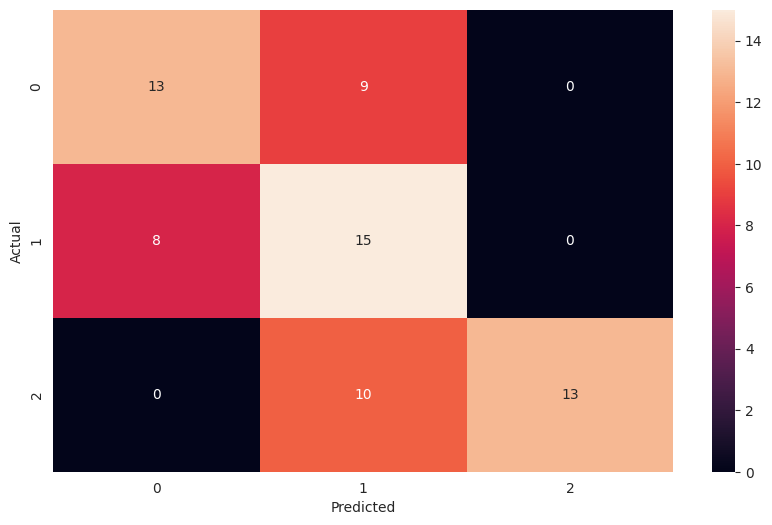

              precision    recall  f1-score   support

     class 2       0.70      0.69      0.70        45
     class 1       0.42      0.43      0.43        23

    accuracy                           0.60        68
   macro avg       0.56      0.56      0.56        68
weighted avg       0.61      0.60      0.60        68

              precision    recall  f1-score   support

     class 1       0.67      0.55      0.60        22
     class 0       0.63      0.74      0.68        23

    accuracy                           0.64        45
   macro avg       0.65      0.64      0.64        45
weighted avg       0.65      0.64      0.64        45

              precision    recall  f1-score   support

     class 0       0.67      0.55      0.60        22
     class 1       0.42      0.74      0.54        23
     class 2       1.00      0.43      0.61        23

    accuracy                           0.57        68
   macro avg       0.70      0.57      0.58        68
weighted avg       0

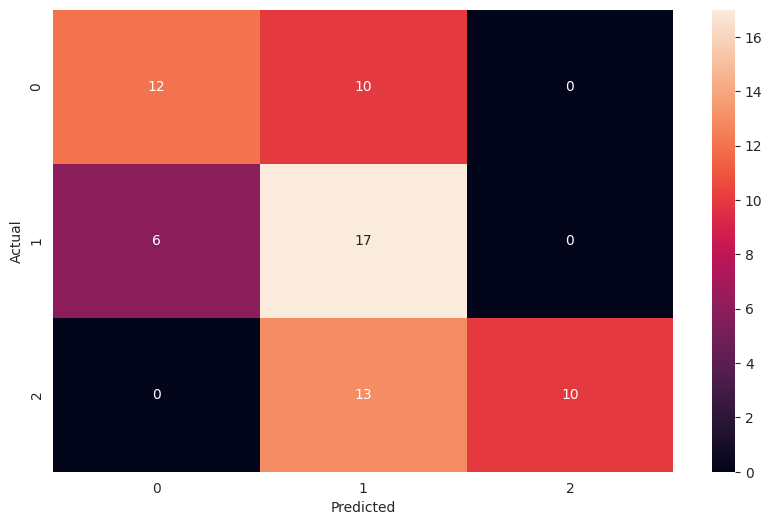

              precision    recall  f1-score   support

     class 2       0.70      0.71      0.70        45
     class 1       0.41      0.39      0.40        23

    accuracy                           0.60        68
   macro avg       0.55      0.55      0.55        68
weighted avg       0.60      0.60      0.60        68

              precision    recall  f1-score   support

     class 1       0.70      0.73      0.71        22
     class 0       0.73      0.70      0.71        23

    accuracy                           0.71        45
   macro avg       0.71      0.71      0.71        45
weighted avg       0.71      0.71      0.71        45

              precision    recall  f1-score   support

     class 0       0.70      0.73      0.71        22
     class 1       0.44      0.70      0.54        23
     class 2       1.00      0.39      0.56        23

    accuracy                           0.60        68
   macro avg       0.71      0.60      0.61        68
weighted avg       0

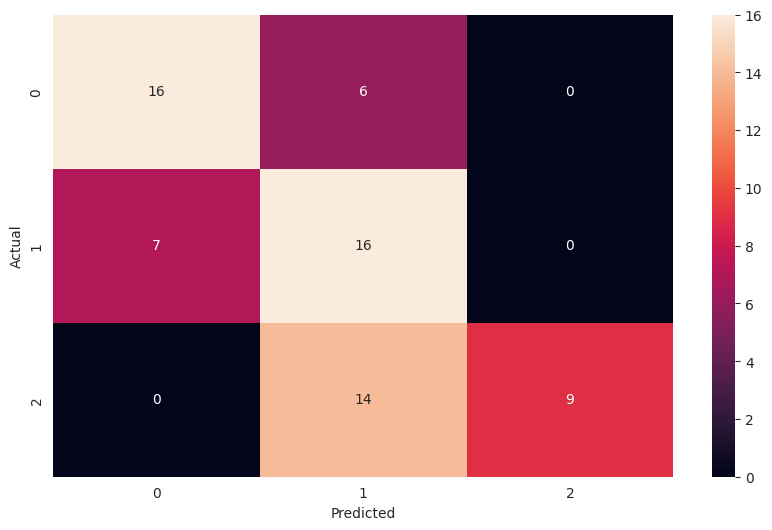

              precision    recall  f1-score   support

     class 2       0.76      0.62      0.68        45
     class 1       0.45      0.61      0.52        23

    accuracy                           0.62        68
   macro avg       0.60      0.62      0.60        68
weighted avg       0.65      0.62      0.63        68

              precision    recall  f1-score   support

     class 1       0.83      0.68      0.75        22
     class 0       0.74      0.87      0.80        23

    accuracy                           0.78        45
   macro avg       0.79      0.78      0.77        45
weighted avg       0.79      0.78      0.78        45

              precision    recall  f1-score   support

     class 0       0.83      0.68      0.75        22
     class 1       0.56      0.87      0.68        23
     class 2       1.00      0.61      0.76        23

    accuracy                           0.72        68
   macro avg       0.80      0.72      0.73        68
weighted avg       0

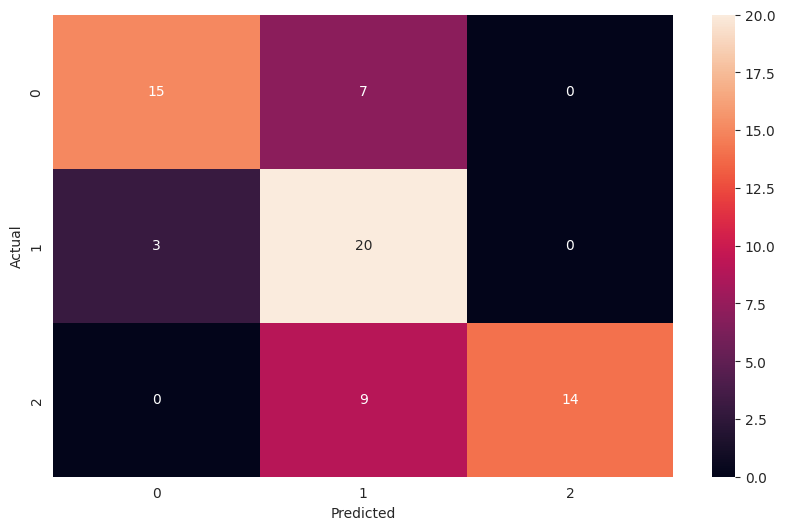

              precision    recall  f1-score   support

     class 2       0.74      0.67      0.70        46
     class 1       0.42      0.50      0.46        22

    accuracy                           0.62        68
   macro avg       0.58      0.59      0.58        68
weighted avg       0.64      0.62      0.62        68

              precision    recall  f1-score   support

     class 1       0.62      0.57      0.59        23
     class 0       0.60      0.65      0.63        23

    accuracy                           0.61        46
   macro avg       0.61      0.61      0.61        46
weighted avg       0.61      0.61      0.61        46

              precision    recall  f1-score   support

     class 0       0.62      0.57      0.59        23
     class 1       0.42      0.65      0.51        23
     class 2       1.00      0.50      0.67        22

    accuracy                           0.57        68
   macro avg       0.68      0.57      0.59        68
weighted avg       0

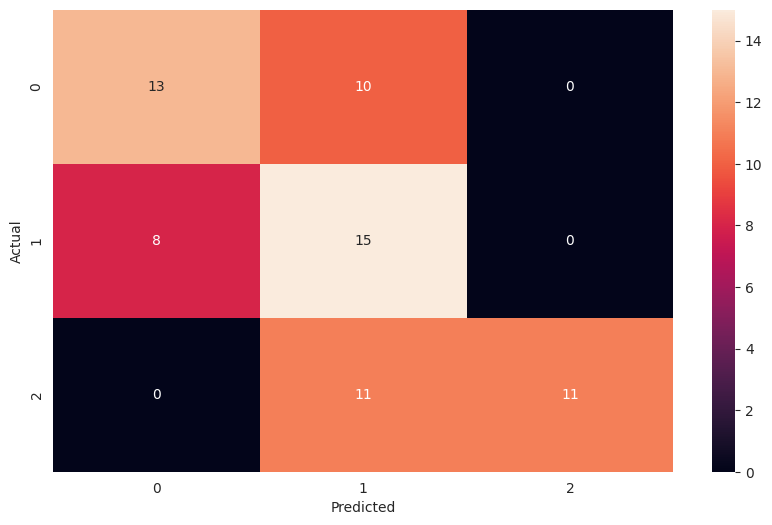

              precision    recall  f1-score   support

     class 2       0.81      0.76      0.79        46
     class 1       0.56      0.64      0.60        22

    accuracy                           0.72        68
   macro avg       0.69      0.70      0.69        68
weighted avg       0.73      0.72      0.72        68

              precision    recall  f1-score   support

     class 1       0.70      0.61      0.65        23
     class 0       0.65      0.74      0.69        23

    accuracy                           0.67        46
   macro avg       0.68      0.67      0.67        46
weighted avg       0.68      0.67      0.67        46

              precision    recall  f1-score   support

     class 0       0.70      0.61      0.65        23
     class 1       0.50      0.74      0.60        23
     class 2       1.00      0.64      0.78        22

    accuracy                           0.66        68
   macro avg       0.73      0.66      0.68        68
weighted avg       0

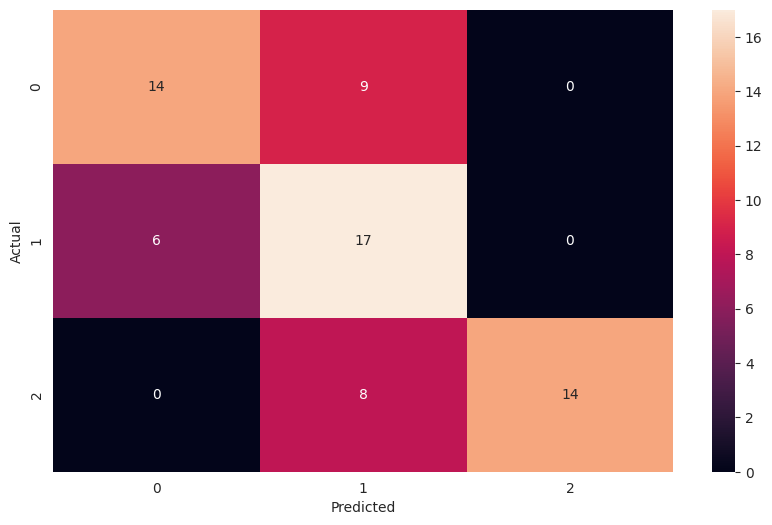

              precision    recall  f1-score   support

     class 2       0.79      0.74      0.76        46
     class 1       0.52      0.59      0.55        22

    accuracy                           0.69        68
   macro avg       0.66      0.67      0.66        68
weighted avg       0.70      0.69      0.70        68

              precision    recall  f1-score   support

     class 1       0.62      0.65      0.64        23
     class 0       0.64      0.61      0.62        23

    accuracy                           0.63        46
   macro avg       0.63      0.63      0.63        46
weighted avg       0.63      0.63      0.63        46

              precision    recall  f1-score   support

     class 0       0.62      0.65      0.64        23
     class 1       0.45      0.61      0.52        23
     class 2       1.00      0.59      0.74        22

    accuracy                           0.62        68
   macro avg       0.69      0.62      0.63        68
weighted avg       0

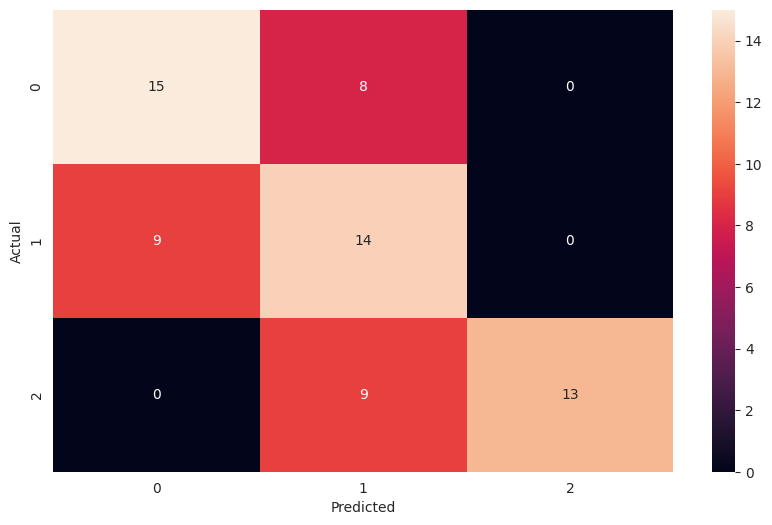

              precision    recall  f1-score   support

     class 2       0.77      0.74      0.76        46
     class 1       0.50      0.55      0.52        22

    accuracy                           0.68        68
   macro avg       0.64      0.64      0.64        68
weighted avg       0.68      0.68      0.68        68

              precision    recall  f1-score   support

     class 1       0.68      0.83      0.75        23
     class 0       0.78      0.61      0.68        23

    accuracy                           0.72        46
   macro avg       0.73      0.72      0.71        46
weighted avg       0.73      0.72      0.71        46

              precision    recall  f1-score   support

     class 0       0.68      0.83      0.75        23
     class 1       0.50      0.61      0.55        23
     class 2       1.00      0.55      0.71        22

    accuracy                           0.66        68
   macro avg       0.73      0.66      0.67        68
weighted avg       0

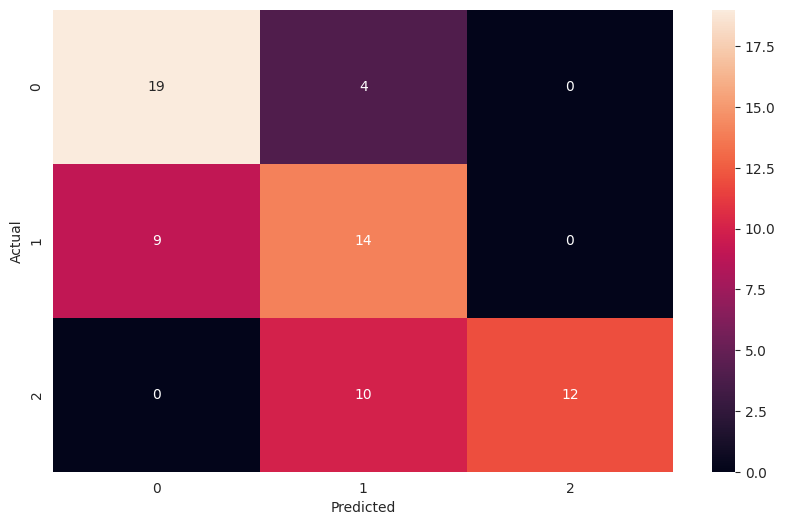

              precision    recall  f1-score   support

     class 2       0.74      0.74      0.74        46
     class 1       0.45      0.45      0.45        22

    accuracy                           0.65        68
   macro avg       0.60      0.60      0.60        68
weighted avg       0.65      0.65      0.65        68

              precision    recall  f1-score   support

     class 1       0.61      0.74      0.67        23
     class 0       0.67      0.52      0.59        23

    accuracy                           0.63        46
   macro avg       0.64      0.63      0.63        46
weighted avg       0.64      0.63      0.63        46

              precision    recall  f1-score   support

     class 0       0.61      0.74      0.67        23
     class 1       0.40      0.52      0.45        23
     class 2       1.00      0.45      0.62        22

    accuracy                           0.57        68
   macro avg       0.67      0.57      0.58        68
weighted avg       0

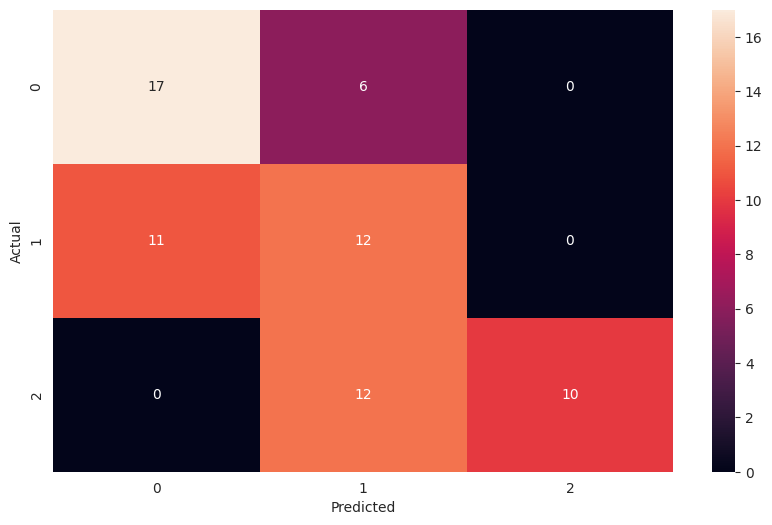

[63.23529411764706, 60.29411764705882, 57.35294117647059, 60.29411764705882, 72.05882352941177, 57.35294117647059, 66.17647058823529, 61.76470588235294, 66.17647058823529, 57.35294117647059]
CV Accuracy Score: 62.21% (+/- 4.56%)
CV  F1 Score: 63.13% (+/- 4.51%)
CV  Precision Score: 62.21% (+/- 4.56%)


In [81]:
skf = StratifiedKFold(n_splits=10,shuffle=True, random_state=12)
cv_acc_scores =[]
cv_f1_scores =[]
cv_precision_scores =[]

X= finalDf[['PC1', 'PC2','PC3', 'PC4','PC5', 'PC6','PC7', 'PC8','PC9', 'PC10','PC11', 'PC12','PC13', 'PC14','PC15', 'PC16','PC17', 'PC18','PC19', 'PC20']]
y=finalDf['Hired3C']
for train_index, test_index in skf.split(X, y):


    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]

    acc,f1,precision = CreateModel( X_train, X_test, y_train, y_test)


    cv_acc_scores.append(acc*100)
    cv_f1_scores.append(f1*100)
    cv_precision_scores.append(precision*100)

print(cv_acc_scores )
print("CV Accuracy Score: %.2f%% (+/- %.2f%%)" % (np.mean(cv_acc_scores), np.std(cv_acc_scores)))
print("CV  F1 Score: %.2f%% (+/- %.2f%%)" % (np.mean(cv_f1_scores), np.std(cv_f1_scores)))
print("CV  Precision Score: %.2f%% (+/- %.2f%%)" % (np.mean(cv_precision_scores), np.std(cv_precision_scores)))


## LIGHTGBM

In [82]:
from lightgbm import LGBMClassifier

def CreateModel(X_train, X_test, y_train, y_test):
    y_21_test = [2 if i == 2 else 1 for i in y_test]
    y_21_train = [2 if i == 2 else 1 for i in y_train]
    X = X_train
    y = y_21_train

    # Using LightGBM Classifier
    clf = LGBMClassifier(random_state=0)
    clf.fit(X, y)
    clf.score(X, y)
    y_21_predict = clf.predict(X_test)
    target_names = ['class 2', 'class 1']
    print(classification_report(y_21_test, y_21_predict, target_names=target_names, zero_division=0))

    X_10_train = X_train.loc[y_train != 2]
    X_10_test = X_test.loc[y_test != 2]

    y_10_train = [i for i in y_train if i != 2]

    y_10_test = [i for i in y_test if i != 2]
    X = X_10_train
    y = y_10_train

    # Using LightGBM Classifier
    clf = LGBMClassifier(random_state=0)
    clf.fit(X, y)
    clf.score(X, y)
    y_10_predict = clf.predict(X_10_test)
    target_names = ['class 1', 'class 0']
    print(classification_report(y_10_test, y_10_predict, target_names=target_names, zero_division=0))

    y1 = list(y_test)
    y2 = list(y_21_predict)
    y3 = list(y_10_predict)
    combined_Predictions = []
    k = 0
    for (i, j) in zip(y1, y2):
        if i != 2:
            combined_Predictions.append(y3[k])
            k += 1
        else:
            combined_Predictions.append(j)
    target_names = ['class 0', 'class 1', 'class 2']
    print(classification_report(y_test, combined_Predictions, target_names=target_names, zero_division=0))

    plt.figure(figsize=(10, 6))
    sns.heatmap(confusion_matrix(y_test, combined_Predictions), annot=True, fmt='d')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

    acc = accuracy_score(y_test, combined_Predictions, normalize=True)
    f1 = f1_score(y_test, combined_Predictions, average='weighted')
    precision = precision_score(y_test, combined_Predictions, average='micro')
    return acc, f1, precision

[LightGBM] [Info] Number of positive: 202, number of negative: 410
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000275 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4086
[LightGBM] [Info] Number of data points in the train set: 612, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.330065 -> initscore=-0.707889
[LightGBM] [Info] Start training from score -0.707889
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

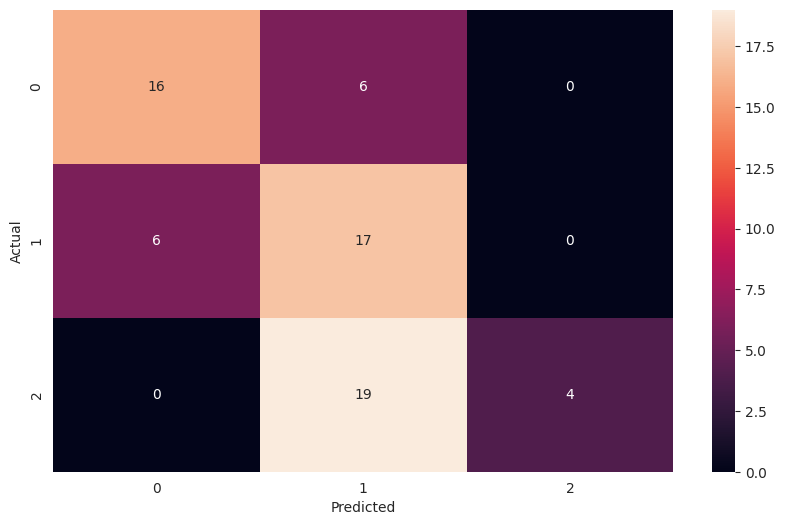

[LightGBM] [Info] Number of positive: 202, number of negative: 410
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000215 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4085
[LightGBM] [Info] Number of data points in the train set: 612, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.330065 -> initscore=-0.707889
[LightGBM] [Info] Start training from score -0.707889
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

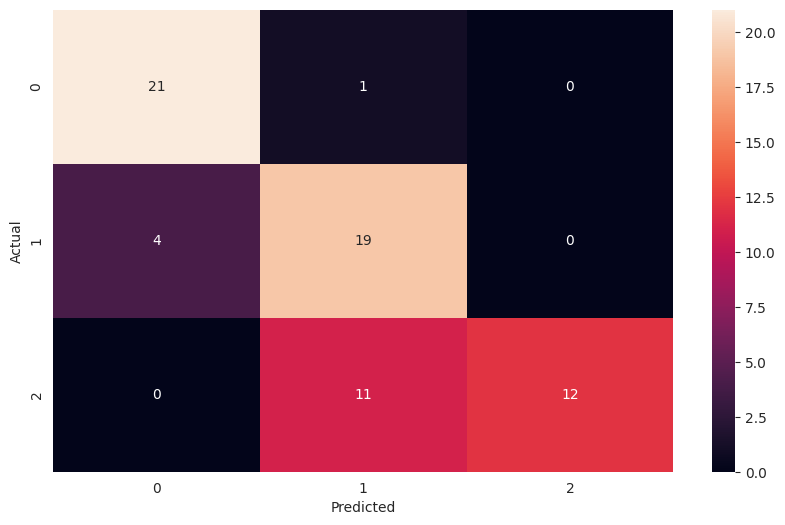

[LightGBM] [Info] Number of positive: 202, number of negative: 410
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000219 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4086
[LightGBM] [Info] Number of data points in the train set: 612, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.330065 -> initscore=-0.707889
[LightGBM] [Info] Start training from score -0.707889
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

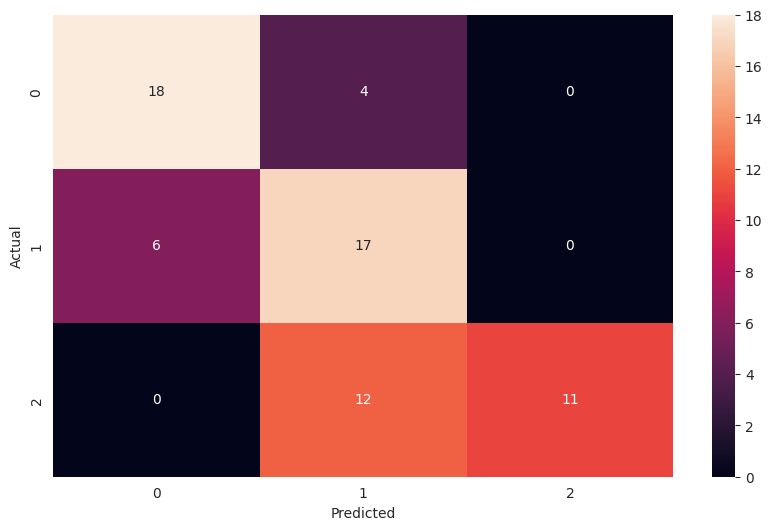

[LightGBM] [Info] Number of positive: 202, number of negative: 410
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000233 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4086
[LightGBM] [Info] Number of data points in the train set: 612, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.330065 -> initscore=-0.707889
[LightGBM] [Info] Start training from score -0.707889
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

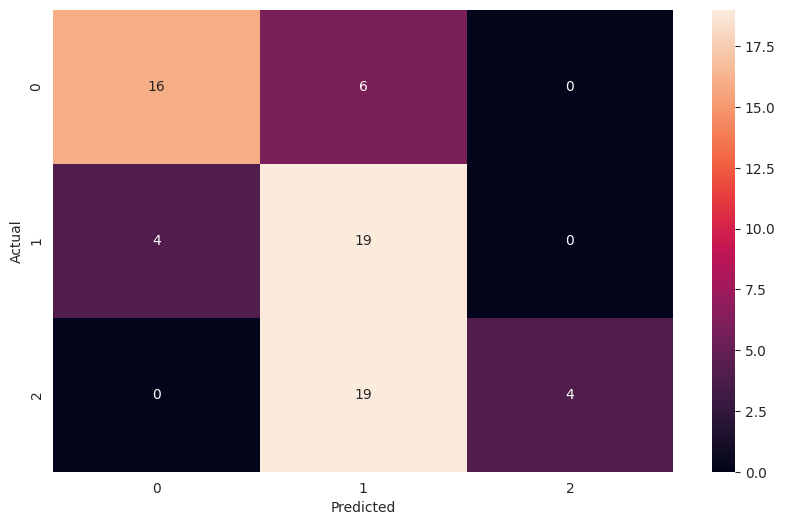

[LightGBM] [Info] Number of positive: 202, number of negative: 410
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000280 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4088
[LightGBM] [Info] Number of data points in the train set: 612, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.330065 -> initscore=-0.707889
[LightGBM] [Info] Start training from score -0.707889
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

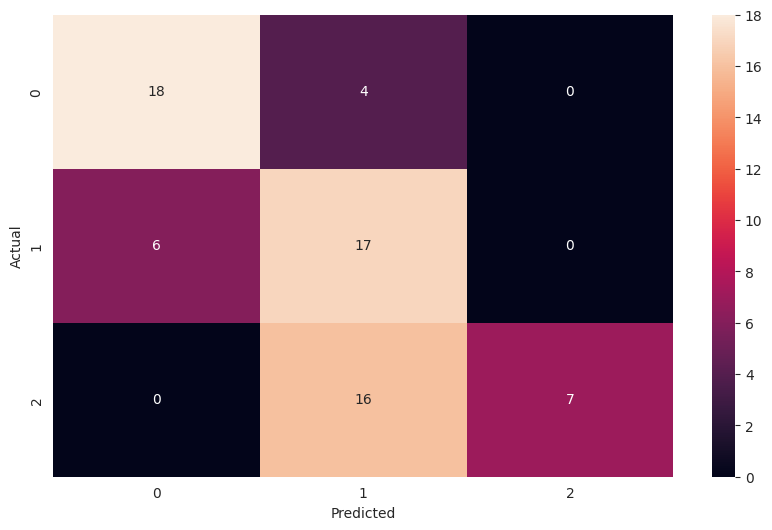

[LightGBM] [Info] Number of positive: 203, number of negative: 409
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000240 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4083
[LightGBM] [Info] Number of data points in the train set: 612, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.331699 -> initscore=-0.700509
[LightGBM] [Info] Start training from score -0.700509
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

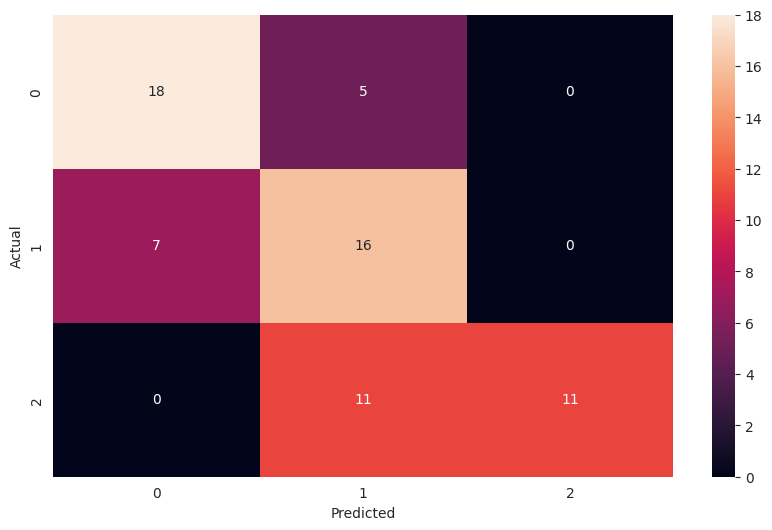

[LightGBM] [Info] Number of positive: 203, number of negative: 409
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000259 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4087
[LightGBM] [Info] Number of data points in the train set: 612, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.331699 -> initscore=-0.700509
[LightGBM] [Info] Start training from score -0.700509
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

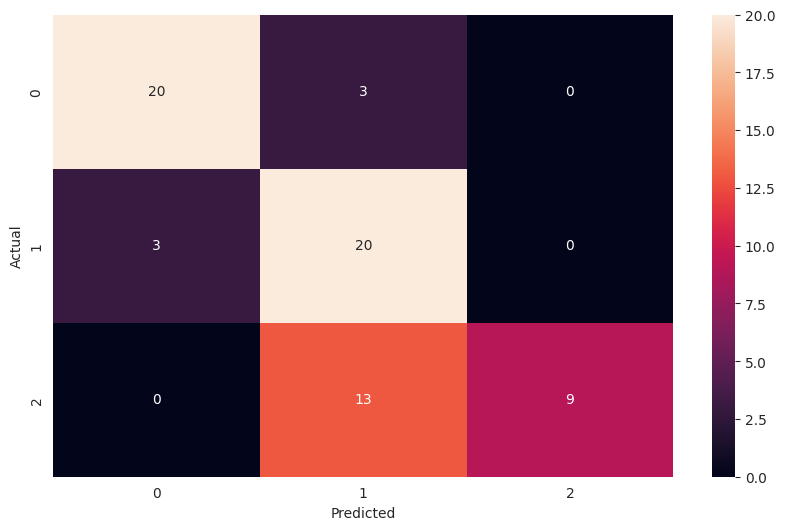

[LightGBM] [Info] Number of positive: 203, number of negative: 409
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000233 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4089
[LightGBM] [Info] Number of data points in the train set: 612, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.331699 -> initscore=-0.700509
[LightGBM] [Info] Start training from score -0.700509
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

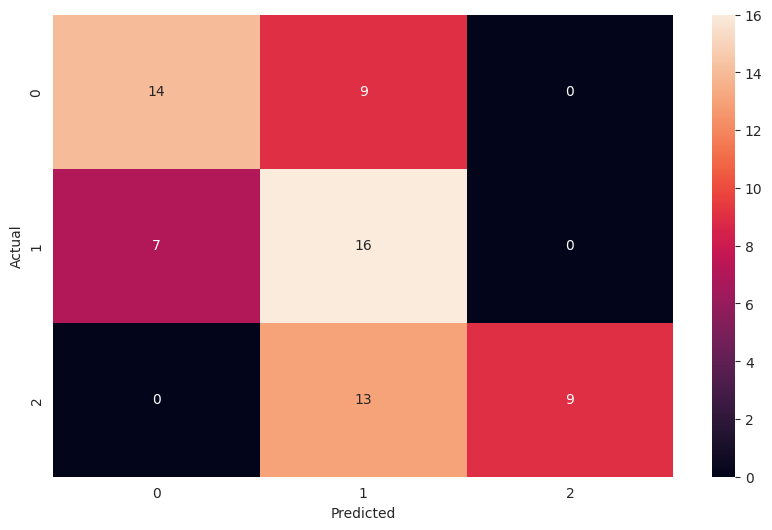

[LightGBM] [Info] Number of positive: 203, number of negative: 409
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000238 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4085
[LightGBM] [Info] Number of data points in the train set: 612, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.331699 -> initscore=-0.700509
[LightGBM] [Info] Start training from score -0.700509
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

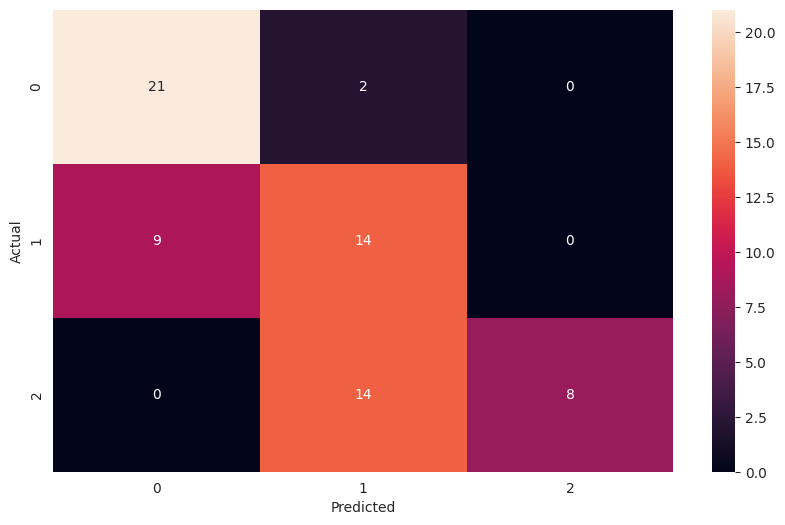

[LightGBM] [Info] Number of positive: 203, number of negative: 409
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000221 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4085
[LightGBM] [Info] Number of data points in the train set: 612, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.331699 -> initscore=-0.700509
[LightGBM] [Info] Start training from score -0.700509
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

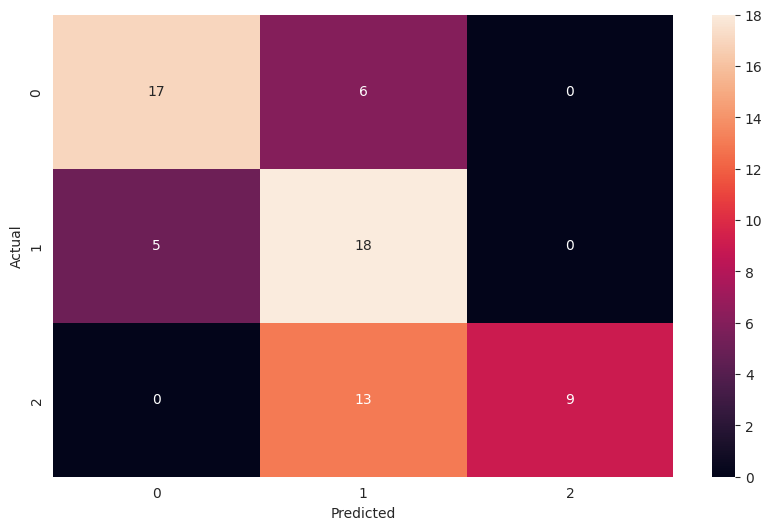

[54.41176470588235, 76.47058823529412, 67.64705882352942, 57.35294117647059, 61.76470588235294, 66.17647058823529, 72.05882352941177, 57.35294117647059, 63.23529411764706, 64.70588235294117]
CV Accuracy Score: 64.12% (+/- 6.52%)
CV  F1 Score: 63.14% (+/- 7.25%)
CV  Precision Score: 64.12% (+/- 6.52%)


In [83]:
skf = StratifiedKFold(n_splits=10,shuffle=True, random_state=12)
cv_acc_scores =[]
cv_f1_scores =[]
cv_precision_scores =[]

X= finalDf[['PC1', 'PC2','PC3', 'PC4','PC5', 'PC6','PC7', 'PC8','PC9', 'PC10','PC11', 'PC12','PC13', 'PC14','PC15', 'PC16','PC17', 'PC18','PC19', 'PC20']]
y=finalDf['Hired3C']
for train_index, test_index in skf.split(X, y):


    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]

    acc,f1,precision = CreateModel( X_train, X_test, y_train, y_test)


    cv_acc_scores.append(acc*100)
    cv_f1_scores.append(f1*100)
    cv_precision_scores.append(precision*100)

print(cv_acc_scores )
print("CV Accuracy Score: %.2f%% (+/- %.2f%%)" % (np.mean(cv_acc_scores), np.std(cv_acc_scores)))
print("CV  F1 Score: %.2f%% (+/- %.2f%%)" % (np.mean(cv_f1_scores), np.std(cv_f1_scores)))
print("CV  Precision Score: %.2f%% (+/- %.2f%%)" % (np.mean(cv_precision_scores), np.std(cv_precision_scores)))


## KNN

In [84]:
from sklearn.neighbors import KNeighborsClassifier

def CreateModel(X_train, X_test, y_train, y_test):
    y_21_test = [2 if i == 2 else 1 for i in y_test]
    y_21_train = [2 if i == 2 else 1 for i in y_train]
    X = X_train
    y = y_21_train

    # Using LightGBM Classifier
    clf = KNeighborsClassifier(n_neighbors=5)
    clf.fit(X, y)
    clf.score(X, y)
    y_21_predict = clf.predict(X_test)
    target_names = ['class 2', 'class 1']
    print(classification_report(y_21_test, y_21_predict, target_names=target_names, zero_division=0))

    X_10_train = X_train.loc[y_train != 2]
    X_10_test = X_test.loc[y_test != 2]

    y_10_train = [i for i in y_train if i != 2]

    y_10_test = [i for i in y_test if i != 2]
    X = X_10_train
    y = y_10_train

    # Using LightGBM Classifier
    clf = KNeighborsClassifier(n_neighbors=5)
    clf.fit(X, y)
    clf.score(X, y)
    y_10_predict = clf.predict(X_10_test)
    target_names = ['class 1', 'class 0']
    print(classification_report(y_10_test, y_10_predict, target_names=target_names, zero_division=0))

    y1 = list(y_test)
    y2 = list(y_21_predict)
    y3 = list(y_10_predict)
    combined_Predictions = []
    k = 0
    for (i, j) in zip(y1, y2):
        if i != 2:
            combined_Predictions.append(y3[k])
            k += 1
        else:
            combined_Predictions.append(j)
    target_names = ['class 0', 'class 1', 'class 2']
    print(classification_report(y_test, combined_Predictions, target_names=target_names, zero_division=0))

    plt.figure(figsize=(10, 6))
    sns.heatmap(confusion_matrix(y_test, combined_Predictions), annot=True, fmt='d')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

    acc = accuracy_score(y_test, combined_Predictions, normalize=True)
    f1 = f1_score(y_test, combined_Predictions, average='weighted')
    precision = precision_score(y_test, combined_Predictions, average='micro')
    return acc, f1, precision

              precision    recall  f1-score   support

     class 2       0.69      0.84      0.76        45
     class 1       0.46      0.26      0.33        23

    accuracy                           0.65        68
   macro avg       0.58      0.55      0.55        68
weighted avg       0.61      0.65      0.62        68

              precision    recall  f1-score   support

     class 1       0.64      0.73      0.68        22
     class 0       0.70      0.61      0.65        23

    accuracy                           0.67        45
   macro avg       0.67      0.67      0.67        45
weighted avg       0.67      0.67      0.67        45

              precision    recall  f1-score   support

     class 0       0.64      0.73      0.68        22
     class 1       0.38      0.61      0.47        23
     class 2       1.00      0.26      0.41        23

    accuracy                           0.53        68
   macro avg       0.67      0.53      0.52        68
weighted avg       0

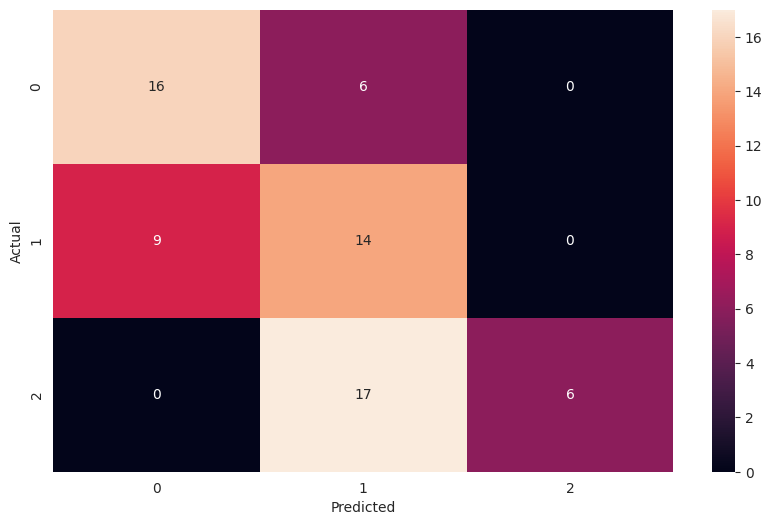

              precision    recall  f1-score   support

     class 2       0.71      0.80      0.75        45
     class 1       0.47      0.35      0.40        23

    accuracy                           0.65        68
   macro avg       0.59      0.57      0.58        68
weighted avg       0.63      0.65      0.63        68

              precision    recall  f1-score   support

     class 1       0.81      0.95      0.88        22
     class 0       0.95      0.78      0.86        23

    accuracy                           0.87        45
   macro avg       0.88      0.87      0.87        45
weighted avg       0.88      0.87      0.87        45

              precision    recall  f1-score   support

     class 0       0.81      0.95      0.88        22
     class 1       0.53      0.78      0.63        23
     class 2       1.00      0.35      0.52        23

    accuracy                           0.69        68
   macro avg       0.78      0.69      0.67        68
weighted avg       0

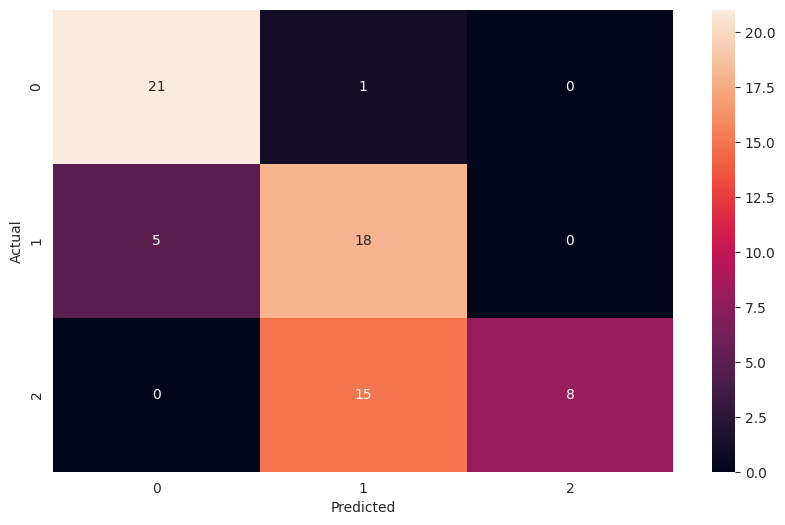

              precision    recall  f1-score   support

     class 2       0.76      0.87      0.81        45
     class 1       0.65      0.48      0.55        23

    accuracy                           0.74        68
   macro avg       0.71      0.67      0.68        68
weighted avg       0.72      0.74      0.72        68

              precision    recall  f1-score   support

     class 1       0.77      0.77      0.77        22
     class 0       0.78      0.78      0.78        23

    accuracy                           0.78        45
   macro avg       0.78      0.78      0.78        45
weighted avg       0.78      0.78      0.78        45

              precision    recall  f1-score   support

     class 0       0.77      0.77      0.77        22
     class 1       0.51      0.78      0.62        23
     class 2       1.00      0.48      0.65        23

    accuracy                           0.68        68
   macro avg       0.76      0.68      0.68        68
weighted avg       0

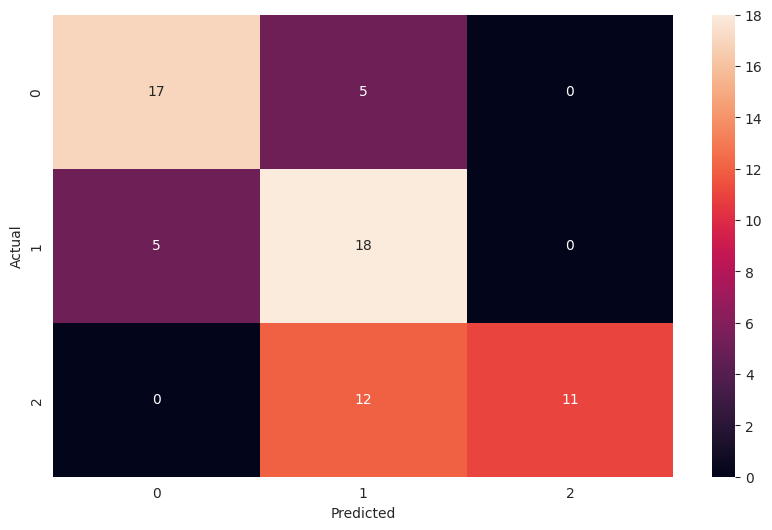

              precision    recall  f1-score   support

     class 2       0.75      0.91      0.82        45
     class 1       0.69      0.39      0.50        23

    accuracy                           0.74        68
   macro avg       0.72      0.65      0.66        68
weighted avg       0.73      0.74      0.71        68

              precision    recall  f1-score   support

     class 1       0.73      0.73      0.73        22
     class 0       0.74      0.74      0.74        23

    accuracy                           0.73        45
   macro avg       0.73      0.73      0.73        45
weighted avg       0.73      0.73      0.73        45

              precision    recall  f1-score   support

     class 0       0.73      0.73      0.73        22
     class 1       0.46      0.74      0.57        23
     class 2       1.00      0.39      0.56        23

    accuracy                           0.62        68
   macro avg       0.73      0.62      0.62        68
weighted avg       0

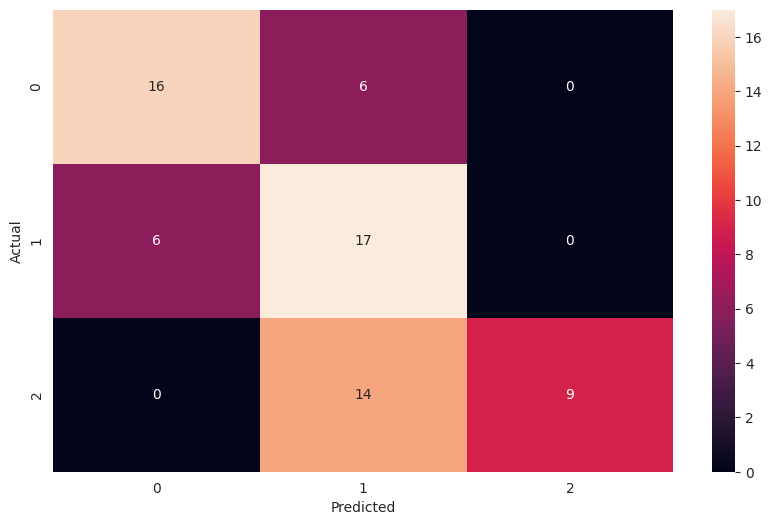

              precision    recall  f1-score   support

     class 2       0.71      0.71      0.71        45
     class 1       0.43      0.43      0.43        23

    accuracy                           0.62        68
   macro avg       0.57      0.57      0.57        68
weighted avg       0.62      0.62      0.62        68

              precision    recall  f1-score   support

     class 1       0.72      0.82      0.77        22
     class 0       0.80      0.70      0.74        23

    accuracy                           0.76        45
   macro avg       0.76      0.76      0.76        45
weighted avg       0.76      0.76      0.75        45

              precision    recall  f1-score   support

     class 0       0.72      0.82      0.77        22
     class 1       0.48      0.70      0.57        23
     class 2       1.00      0.43      0.61        23

    accuracy                           0.65        68
   macro avg       0.73      0.65      0.65        68
weighted avg       0

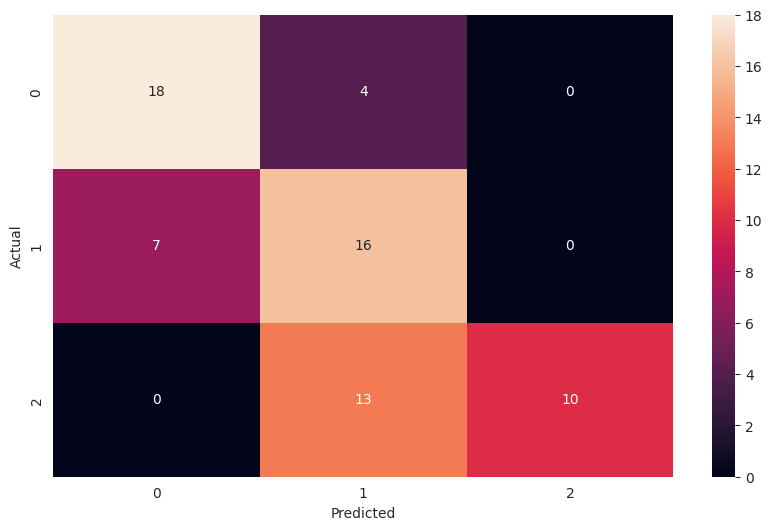

              precision    recall  f1-score   support

     class 2       0.80      0.85      0.82        46
     class 1       0.63      0.55      0.59        22

    accuracy                           0.75        68
   macro avg       0.71      0.70      0.70        68
weighted avg       0.74      0.75      0.74        68

              precision    recall  f1-score   support

     class 1       0.79      0.83      0.81        23
     class 0       0.82      0.78      0.80        23

    accuracy                           0.80        46
   macro avg       0.80      0.80      0.80        46
weighted avg       0.80      0.80      0.80        46

              precision    recall  f1-score   support

     class 0       0.79      0.83      0.81        23
     class 1       0.56      0.78      0.65        23
     class 2       1.00      0.55      0.71        22

    accuracy                           0.72        68
   macro avg       0.78      0.72      0.72        68
weighted avg       0

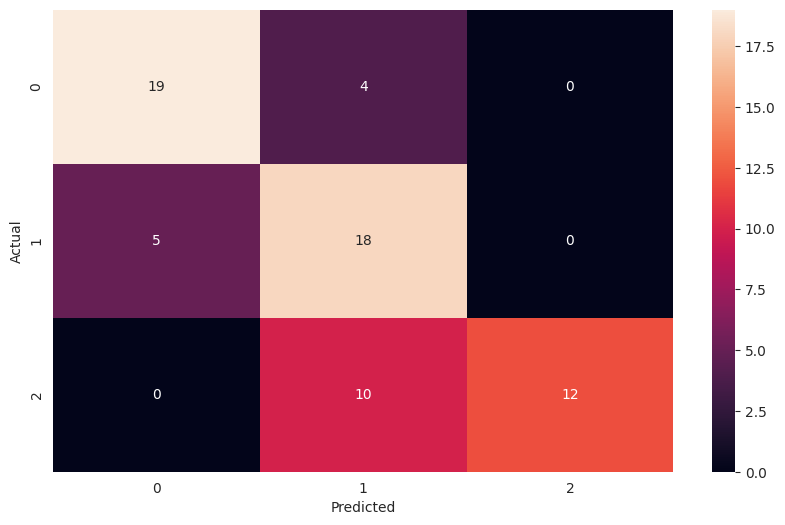

              precision    recall  f1-score   support

     class 2       0.71      0.78      0.74        46
     class 1       0.41      0.32      0.36        22

    accuracy                           0.63        68
   macro avg       0.56      0.55      0.55        68
weighted avg       0.61      0.63      0.62        68

              precision    recall  f1-score   support

     class 1       0.85      0.74      0.79        23
     class 0       0.77      0.87      0.82        23

    accuracy                           0.80        46
   macro avg       0.81      0.80      0.80        46
weighted avg       0.81      0.80      0.80        46

              precision    recall  f1-score   support

     class 0       0.85      0.74      0.79        23
     class 1       0.49      0.87      0.62        23
     class 2       1.00      0.32      0.48        22

    accuracy                           0.65        68
   macro avg       0.78      0.64      0.63        68
weighted avg       0

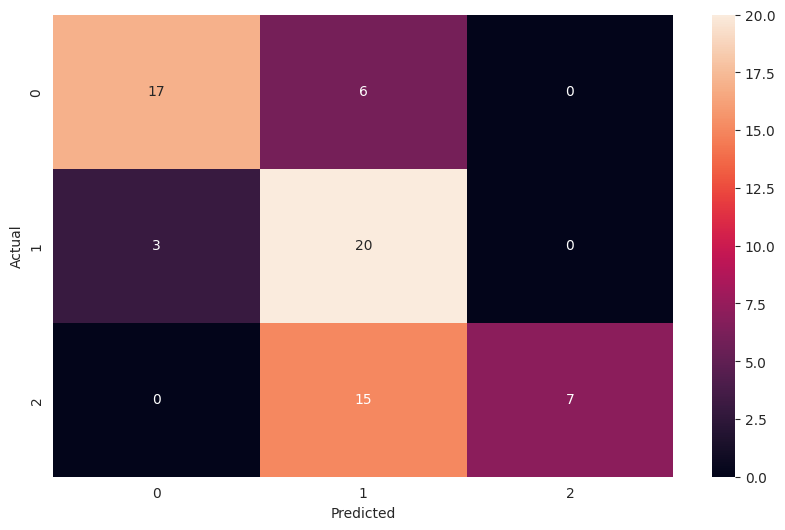

              precision    recall  f1-score   support

     class 2       0.75      0.87      0.81        46
     class 1       0.60      0.41      0.49        22

    accuracy                           0.72        68
   macro avg       0.68      0.64      0.65        68
weighted avg       0.70      0.72      0.70        68

              precision    recall  f1-score   support

     class 1       0.77      0.87      0.82        23
     class 0       0.85      0.74      0.79        23

    accuracy                           0.80        46
   macro avg       0.81      0.80      0.80        46
weighted avg       0.81      0.80      0.80        46

              precision    recall  f1-score   support

     class 0       0.77      0.87      0.82        23
     class 1       0.52      0.74      0.61        23
     class 2       1.00      0.41      0.58        22

    accuracy                           0.68        68
   macro avg       0.76      0.67      0.67        68
weighted avg       0

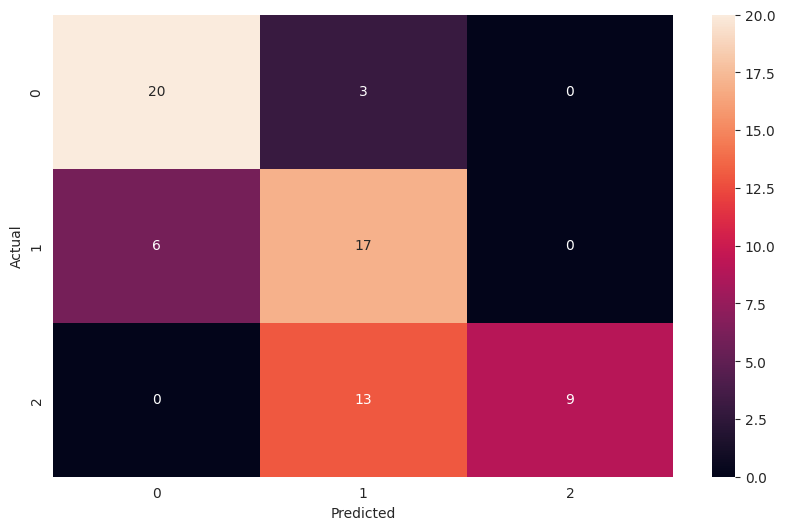

              precision    recall  f1-score   support

     class 2       0.75      0.91      0.82        46
     class 1       0.67      0.36      0.47        22

    accuracy                           0.74        68
   macro avg       0.71      0.64      0.65        68
weighted avg       0.72      0.74      0.71        68

              precision    recall  f1-score   support

     class 1       0.80      0.87      0.83        23
     class 0       0.86      0.78      0.82        23

    accuracy                           0.83        46
   macro avg       0.83      0.83      0.83        46
weighted avg       0.83      0.83      0.83        46

              precision    recall  f1-score   support

     class 0       0.80      0.87      0.83        23
     class 1       0.51      0.78      0.62        23
     class 2       1.00      0.36      0.53        22

    accuracy                           0.68        68
   macro avg       0.77      0.67      0.66        68
weighted avg       0

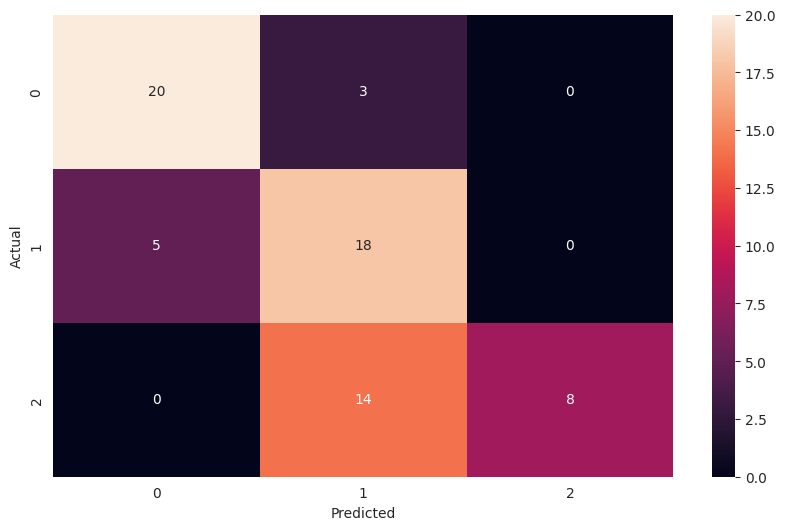

              precision    recall  f1-score   support

     class 2       0.77      0.87      0.82        46
     class 1       0.62      0.45      0.53        22

    accuracy                           0.74        68
   macro avg       0.70      0.66      0.67        68
weighted avg       0.72      0.74      0.72        68

              precision    recall  f1-score   support

     class 1       0.69      0.78      0.73        23
     class 0       0.75      0.65      0.70        23

    accuracy                           0.72        46
   macro avg       0.72      0.72      0.72        46
weighted avg       0.72      0.72      0.72        46

              precision    recall  f1-score   support

     class 0       0.69      0.78      0.73        23
     class 1       0.47      0.65      0.55        23
     class 2       1.00      0.45      0.62        22

    accuracy                           0.63        68
   macro avg       0.72      0.63      0.64        68
weighted avg       0

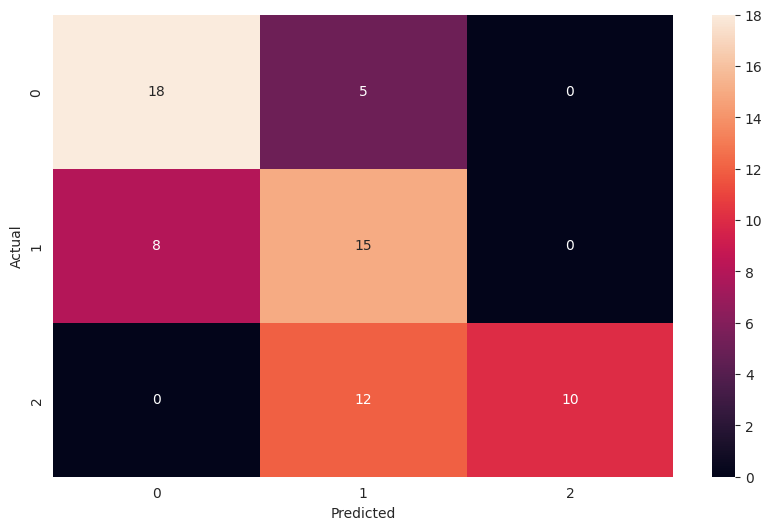

[52.94117647058824, 69.11764705882352, 67.64705882352942, 61.76470588235294, 64.70588235294117, 72.05882352941177, 64.70588235294117, 67.64705882352942, 67.64705882352942, 63.23529411764706]
CV Accuracy Score: 65.15% (+/- 4.97%)
CV  F1 Score: 64.59% (+/- 5.10%)
CV  Precision Score: 65.15% (+/- 4.97%)


In [85]:
skf = StratifiedKFold(n_splits=10,shuffle=True, random_state=12)
cv_acc_scores =[]
cv_f1_scores =[]
cv_precision_scores =[]

X= finalDf[['PC1', 'PC2','PC3', 'PC4','PC5', 'PC6','PC7', 'PC8','PC9', 'PC10','PC11', 'PC12','PC13', 'PC14','PC15', 'PC16','PC17', 'PC18','PC19', 'PC20']]
y=finalDf['Hired3C']
for train_index, test_index in skf.split(X, y):


    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]

    acc,f1,precision = CreateModel( X_train, X_test, y_train, y_test)


    cv_acc_scores.append(acc*100)
    cv_f1_scores.append(f1*100)
    cv_precision_scores.append(precision*100)

print(cv_acc_scores )
print("CV Accuracy Score: %.2f%% (+/- %.2f%%)" % (np.mean(cv_acc_scores), np.std(cv_acc_scores)))
print("CV  F1 Score: %.2f%% (+/- %.2f%%)" % (np.mean(cv_f1_scores), np.std(cv_f1_scores)))
print("CV  Precision Score: %.2f%% (+/- %.2f%%)" % (np.mean(cv_precision_scores), np.std(cv_precision_scores)))


## AdaBoost

In [1]:
from sklearn.ensemble import AdaBoostClassifier
def CreateModel( X_train, X_test, y_train, y_test):
    y_21_test = []
    for i in y_test:
        if(i == 2):
            y_21_test.append(2)
        else:
            y_21_test.append(1)

    y_21_train = []
    for i in y_train:
        if(i == 2):
            y_21_train.append(2)
        else:
            y_21_train.append(1)

    X = X_train
    y = y_21_train
    clf = AdaBoostClassifier(n_estimators=100, random_state=0)
    clf.fit(X, y)
    clf.score(X, y)

    y_21_predict=clf.predict(X_test)
    target_names = ['class 2', 'class 1']
    print(classification_report(y_21_test,y_21_predict,target_names=target_names, zero_division=0))

    X_10_train = X_train.loc[y_train!= 2]
    X_10_test = X_test.loc[y_test!= 2]

    y_10_train= []
    for i in y_train:
        if(i != 2):
            y_10_train.append(i)


    y_10_test = []
    for i in y_test:
        if(i != 2):
            y_10_test.append(i)

    X = X_10_train
    y = y_10_train
    clf = AdaBoostClassifier(n_estimators=100, random_state=0)
    clf.fit(X, y)
    clf.score(X, y)
    y_10_predict = clf.predict(X_10_test)
    target_names = ['class 1', 'class 0']
    print(classification_report(y_10_test,y_10_predict ,target_names=target_names, zero_division=0))

    y1=list(y_test)
    y2=list(y_21_predict)
    y3=list(y_10_predict)
    combined_Predictions = []
    k=0
    for (i,j) in zip(y1,y2):
        if(i!=2):
            combined_Predictions.append(y3[k])
            k=k+1
        else:
            combined_Predictions.append(j)
    target_names = ['class 0', 'class 1', 'class 2']
    print(classification_report(y_test,combined_Predictions ,target_names=target_names, zero_division=0))

    plt.figure(figsize = (10,6))
    sns.heatmap(confusion_matrix(y_test, combined_Predictions), annot = True,fmt='d')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

   # metrics.plot_roc_curve(clf, X_test, y_test)

    acc = accuracy_score(y_test, combined_Predictions, normalize=True)
    f1 =  f1_score(y_test, combined_Predictions, average='weighted')
    precision = precision_score(y_test, combined_Predictions,average='micro')


    return acc,f1,precision

In [2]:
skf = StratifiedKFold(n_splits=10,shuffle=True, random_state=12)
cv_acc_scores =[]
cv_f1_scores =[]
cv_precision_scores =[]

X= finalDf[['PC1', 'PC2','PC3', 'PC4','PC5', 'PC6','PC7', 'PC8','PC9', 'PC10','PC11', 'PC12','PC13', 'PC14','PC15', 'PC16','PC17', 'PC18','PC19', 'PC20']]
y=finalDf['Hired3C']
for train_index, test_index in skf.split(X, y):


    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]

    acc,f1,precision = CreateModel( X_train, X_test, y_train, y_test)


    cv_acc_scores.append(acc*100)
    cv_f1_scores.append(f1*100)
    cv_precision_scores.append(precision*100)

print(cv_acc_scores )
print("CV Accuracy Score: %.2f%% (+/- %.2f%%)" % (np.mean(cv_acc_scores), np.std(cv_acc_scores)))
print("CV  F1 Score: %.2f%% (+/- %.2f%%)" % (np.mean(cv_f1_scores), np.std(cv_f1_scores)))
print("CV  Precision Score: %.2f%% (+/- %.2f%%)" % (np.mean(cv_precision_scores), np.std(cv_precision_scores)))


NameError: name 'StratifiedKFold' is not defined